<a href="https://colab.research.google.com/github/Series-Parallel/NYC-Prop_Sales-Data_Analysis/blob/main/NYC_Property_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives of this Data Analysis:


  1. Understanding sale price distribution  
  2. Analyzing Borough-Level Trends
  3. Examining Build Classes
  4. Studying Seasonal Trends
  5. Identifying High Value Areas




In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("nyc-rolling-sales.csv")

In [61]:
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [63]:
df.describe()

Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000      1.000000   1920.000000   
50%             1.000000          0.000000      1.000000   1940.000000   
75%             2.000000          0.000000      2.000000   1965.000000   
max          1844.000000       2261.000000   2261.000000   2017.000000   

       TAX CLASS AT TIME OF SALE  
count               84548.000000  
mean                    1.657485  
std                     0.819341  
min                     1.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     4.000000

**Cleaning The Data for better plotting**

In [64]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
0                              C2     6625000 2017-07-19  
1                              C7         -   2016-12-14  
2                              C7         -   2016-12-09  
3                              C4     3936272 2016-09-23  
4                              C2     8000000 2016-11-17  

[5 rows x 22 columns]

In [65]:
df['SALE PRICE'] =  pd.to_numeric(df['SALE PRICE'], errors ='coerce')
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  
0                              C2   6625000.0 2017-07-19  
1                              C7         NaN 2016-12-14  
2                              C7         NaN 2016-12-09  
3                              C4   3936272.0 2016-09-23  
4                              C2   8000000.0 2016-11-17  

[5 rows x 22 columns]

In [66]:
df = df.dropna(subset=['BOROUGH','SALE PRICE'])

#dropping rows which have missing values in Borough or Sale Price

In [67]:
df=df.drop(columns=['Unnamed: 0'])

In [68]:
counts_ = df.map(lambda x: str(x).count('-') )
counts_spaces = df.map(lambda x: str(x).count(' ') )
print(f"there is {counts_.sum().sum()} '-' in the data")
print(f"there is {counts_spaces.sum().sum()} spaces in the data")

there is 250550 '-' in the data
there is 2011376 spaces in the data


**Objective 1 :** Sales Price Distribution

In [69]:
df.drop('EASE-MENT', axis=1, inplace=True)

In [70]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                        C2   
3                   2B    402   21                        C4   
4                   2A    404   55                        C2   
6                   2B    406   32                        C4   
9                    2    387  153                        D9   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  \
0            153 AVENUE B                      10009                  5   
3     154 EAST 7TH STREET                      10009                 10   
4  301 EAST 10TH   STREET                      10009                  6   
6            210 AVENUE B                      10009                  8   
9     629 EAST 5TH STREET                      10009                 24   

   COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                 0            5             1633              6440   
3                 0           10             2272              6794   
4                 0            6             2369              4615   
6                 0            8             1750              4226   
9                 0           24             4489             18523   

   YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0        1900                          2                             C2   
3        1913                          2                             C4   
4        1900                          2                             C2   
6        1920                          2                             C4   
9        1920                          2                             D9   

   SALE PRICE  SALE DATE  
0   6625000.0 2017-07-19  
3   3936272.0 2016-09-23  
4   8000000.0 2016-11-17  
6   3192840.0 2016-09-23  
9  16232000.0 2016-11-07

In [71]:
df.shape

(69987, 20)

In [72]:
map_dict = {'-':np.nan, " ":np.nan}
df.replace(map_dict, inplace=True)

In [73]:
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [74]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                        C2   
3                   2B    402   21                        C4   
4                   2A    404   55                        C2   
6                   2B    406   32                        C4   
9                    2    387  153                        D9   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  \
0            153 AVENUE B              NaN     10009                  5   
3     154 EAST 7TH STREET              NaN     10009                 10   
4  301 EAST 10TH   STREET              NaN     10009                  6   
6            210 AVENUE B              NaN     10009                  8   
9     629 EAST 5TH STREET              NaN     10009                 24   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                 0            5            1633.0             6440.0   
3                 0           10            2272.0             6794.0   
4                 0            6            2369.0             4615.0   
6                 0            8            1750.0             4226.0   
9                 0           24            4489.0            18523.0   

   YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0        1900                          2                             C2   
3        1913                          2                             C4   
4        1900                          2                             C2   
6        1920                          2                             C4   
9        1920                          2                             D9   

   SALE PRICE  SALE DATE  
0   6625000.0 2017-07-19  
3   3936272.0 2016-09-23  
4   8000000.0 2016-11-17  
6   3192840.0 2016-09-23  
9  16232000.0 2016-11-07

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         69987 non-null  int64         
 1   NEIGHBORHOOD                    69987 non-null  object        
 2   BUILDING CLASS CATEGORY         69987 non-null  object        
 3   TAX CLASS AT PRESENT            69314 non-null  object        
 4   BLOCK                           69987 non-null  int64         
 5   LOT                             69987 non-null  int64         
 6   BUILDING CLASS AT PRESENT       69314 non-null  object        
 7   ADDRESS                         69987 non-null  object        
 8   APARTMENT NUMBER                15496 non-null  object        
 9   ZIP CODE                        69987 non-null  int64         
 10  RESIDENTIAL UNITS               69987 non-null  int64         
 11  COMMERC

In [76]:
df['Year'] = df['SALE DATE'].dt.year
df['Month'] = df['SALE DATE'].dt.month

In [77]:
def reduce_memory_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:

            if str(col_type).startswith('int'):
                c_min = df[col].min()
                c_max = df[col].max()
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type).startswith('float'):
                c_min = df[col].min()
                c_max = df[col].max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:

            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after optimization is {end_mem:.2f} MB")
    print(f"Decreased by {(100 * (start_mem - end_mem) / start_mem):.1f}%")

    return df

In [78]:
df = reduce_memory_usage(df)

Memory usage of dataframe is 11.75 MB
Memory usage after optimization is 6.70 MB
Decreased by 43.0%


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         69987 non-null  int8          
 1   NEIGHBORHOOD                    69987 non-null  category      
 2   BUILDING CLASS CATEGORY         69987 non-null  category      
 3   TAX CLASS AT PRESENT            69314 non-null  category      
 4   BLOCK                           69987 non-null  int16         
 5   LOT                             69987 non-null  int16         
 6   BUILDING CLASS AT PRESENT       69314 non-null  category      
 7   ADDRESS                         69987 non-null  category      
 8   APARTMENT NUMBER                15496 non-null  category      
 9   ZIP CODE                        69987 non-null  int16         
 10  RESIDENTIAL UNITS               69987 non-null  int16         
 11  COMMERC

In [80]:
df.isnull().mean()*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.961607
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.961607
ADDRESS                            0.000000
APARTMENT NUMBER                  77.858745
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  30.274194
GROSS SQUARE FEET                 31.061483
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                         0.000000
SALE DATE                          0.000000
Year                               0.000000
Month                              0.000000
dtype: float64

In [81]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                        C2   
3                   2B    402   21                        C4   
4                   2A    404   55                        C2   
6                   2B    406   32                        C4   
9                    2    387  153                        D9   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  ...  TOTAL UNITS  \
0            153 AVENUE B              NaN     10009  ...            5   
3     154 EAST 7TH STREET              NaN     10009  ...           10   
4  301 EAST 10TH   STREET              NaN     10009  ...            6   
6            210 AVENUE B              NaN     10009  ...            8   
9     629 EAST 5TH STREET              NaN     10009  ...           24   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0            1633.0             6440.0        1900                          2   
3            2272.0             6794.0        1913                          2   
4            2369.0             4615.0        1900                          2   
6            1750.0             4226.0        1920                          2   
9            4489.0            18523.0        1920                          2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  Year Month  
0                              C2   6625000.0 2017-07-19  2017     7  
3                              C4   3936272.0 2016-09-23  2016     9  
4                              C2   8000000.0 2016-11-17  2016    11  
6                              C4   3192840.0 2016-09-23  2016     9  
9                              D9  16232000.0 2016-11-07  2016    11  

[5 rows x 22 columns]

In [82]:
for col in ['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE','TAX CLASS AT PRESENT']:
    df = df.dropna(subset = col)
df = df.reset_index(drop = True)

In [83]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                        C2   
1                   2B    402   21                        C4   
2                   2A    404   55                        C2   
3                   2B    406   32                        C4   
4                    2    387  153                        D9   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  ...  TOTAL UNITS  \
0            153 AVENUE B              NaN     10009  ...            5   
1     154 EAST 7TH STREET              NaN     10009  ...           10   
2  301 EAST 10TH   STREET              NaN     10009  ...            6   
3            210 AVENUE B              NaN     10009  ...            8   
4     629 EAST 5TH STREET              NaN     10009  ...           24   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0            1633.0             6440.0        1900                          2   
1            2272.0             6794.0        1913                          2   
2            2369.0             4615.0        1900                          2   
3            1750.0             4226.0        1920                          2   
4            4489.0            18523.0        1920                          2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE  SALE DATE  Year Month  
0                              C2   6625000.0 2017-07-19  2017     7  
1                              C4   3936272.0 2016-09-23  2016     9  
2                              C2   8000000.0 2016-11-17  2016    11  
3                              C4   3192840.0 2016-09-23  2016     9  
4                              D9  16232000.0 2016-11-07  2016    11  

[5 rows x 22 columns]

**Outliers Removal**

In [84]:
df.drop(columns='APARTMENT NUMBER', inplace=True)

In [85]:
num_col = df.select_dtypes(['float32','int16','int8']).columns

<Figure size 400x200 with 0 Axes>

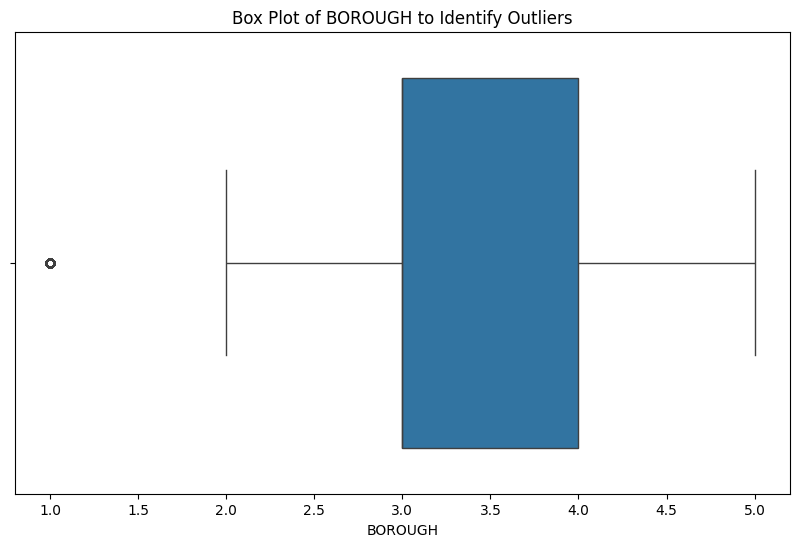

<Figure size 400x200 with 0 Axes>

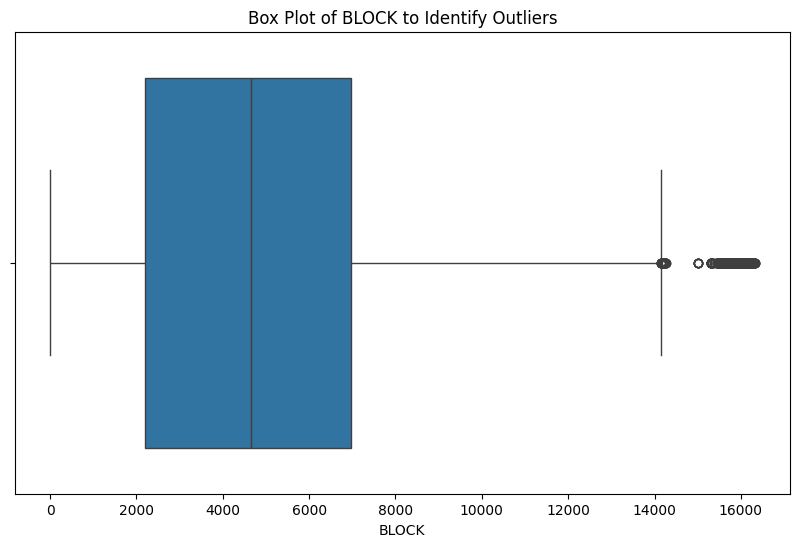

<Figure size 400x200 with 0 Axes>

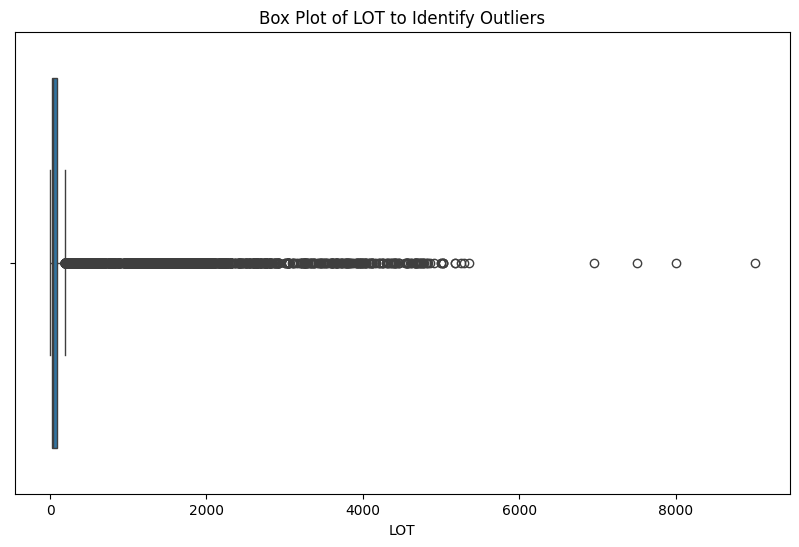

<Figure size 400x200 with 0 Axes>

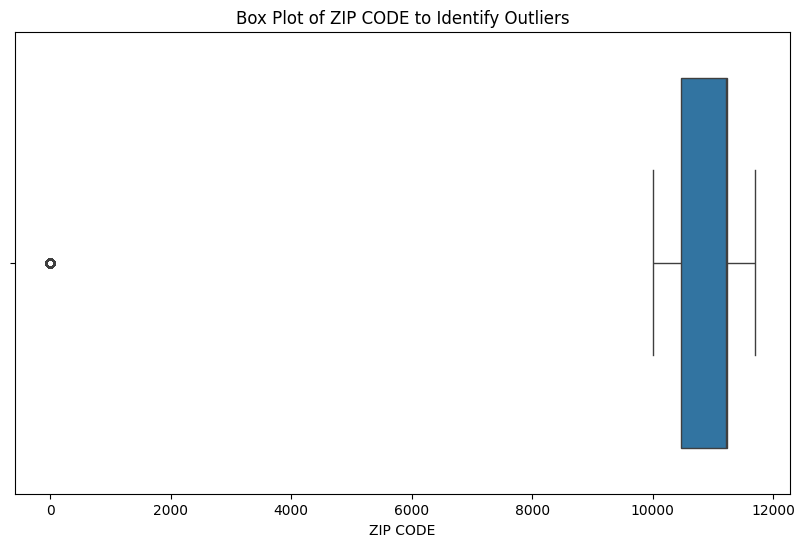

<Figure size 400x200 with 0 Axes>

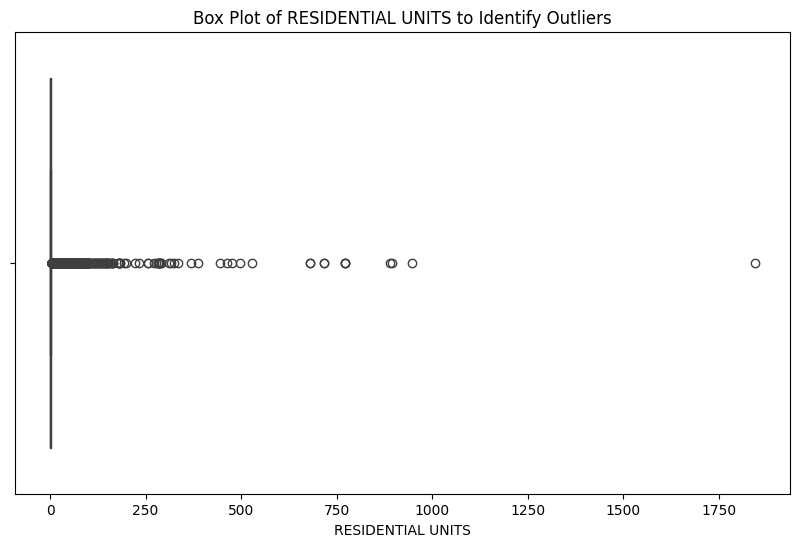

<Figure size 400x200 with 0 Axes>

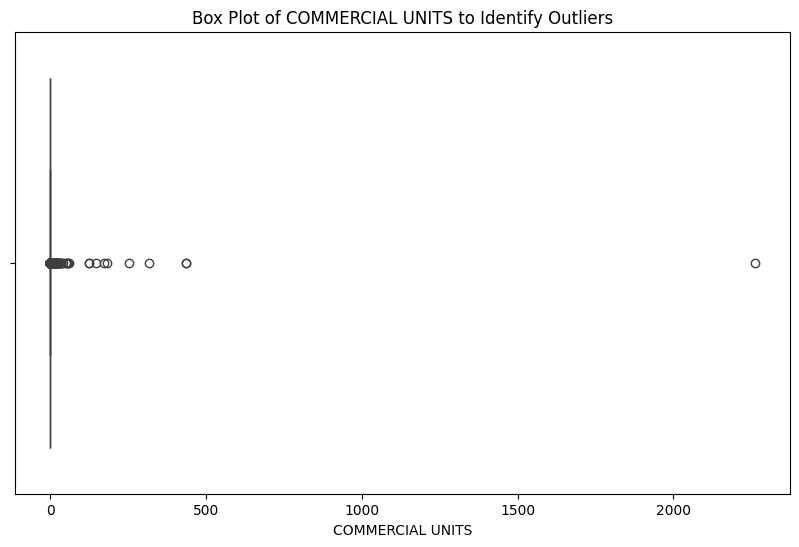

<Figure size 400x200 with 0 Axes>

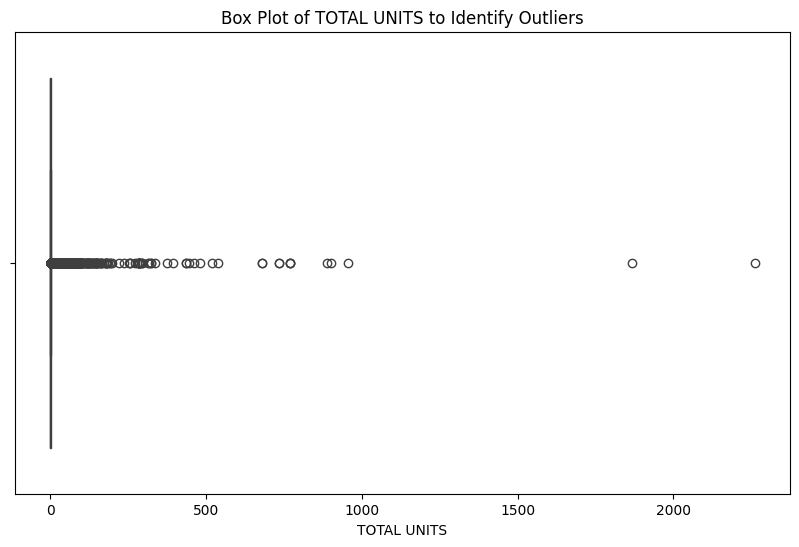

<Figure size 400x200 with 0 Axes>

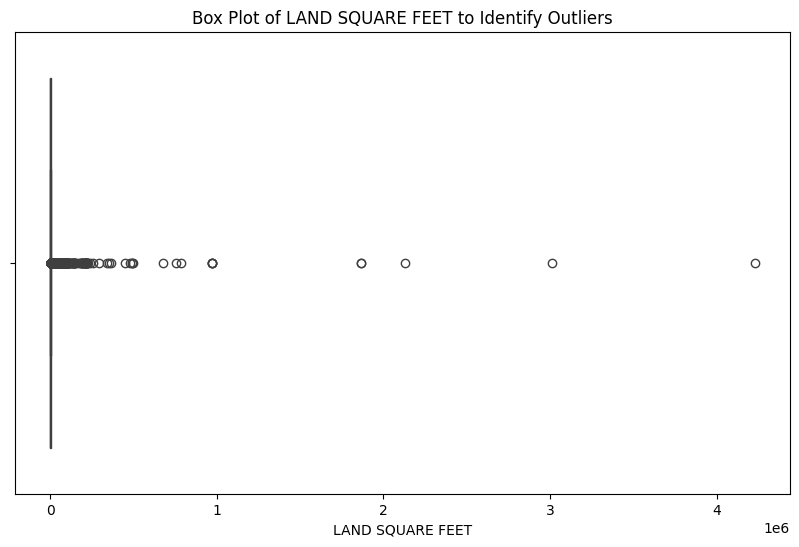

<Figure size 400x200 with 0 Axes>

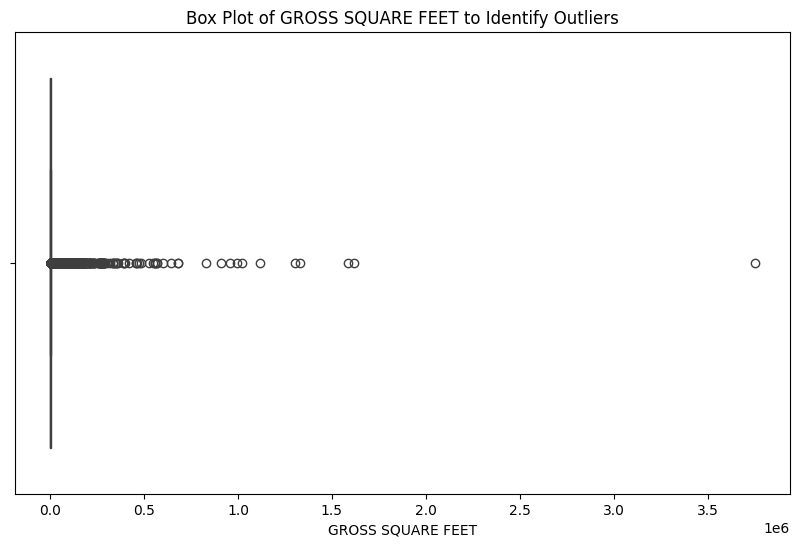

<Figure size 400x200 with 0 Axes>

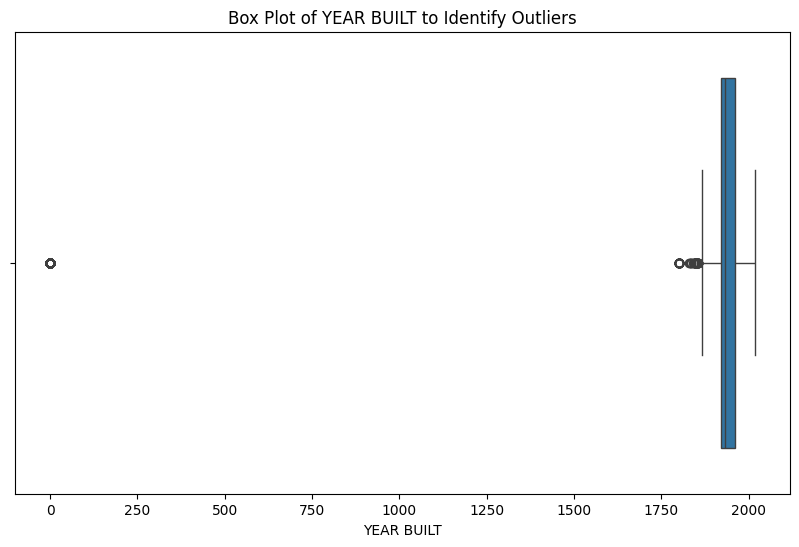

<Figure size 400x200 with 0 Axes>

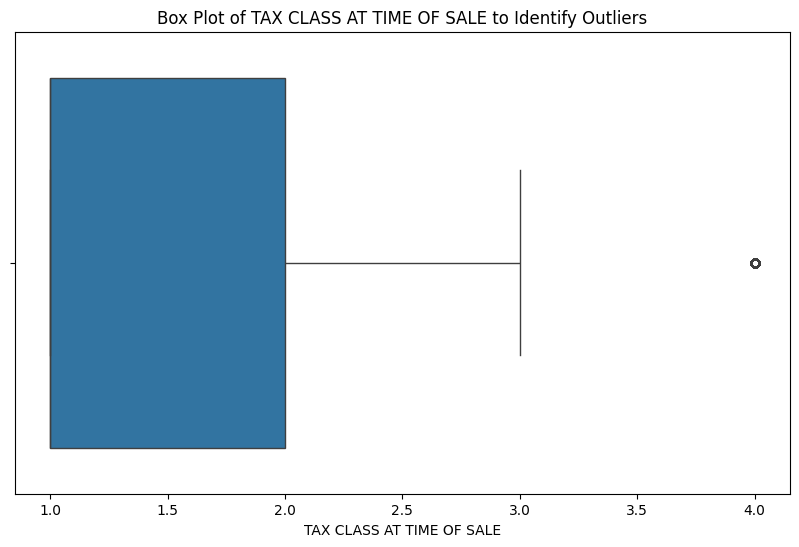

<Figure size 400x200 with 0 Axes>

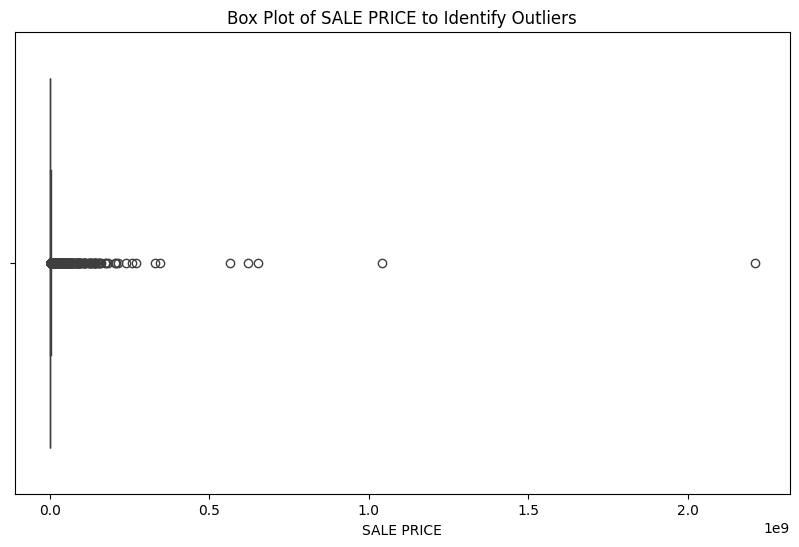

<Figure size 400x200 with 0 Axes>

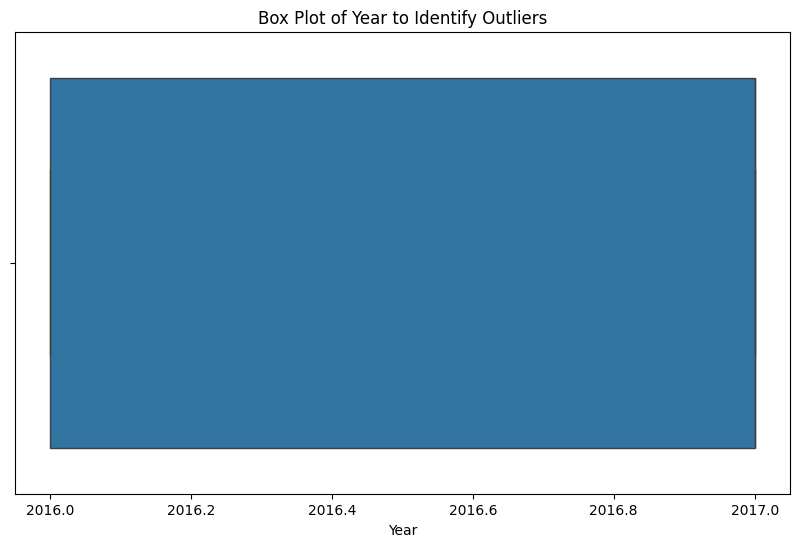

<Figure size 400x200 with 0 Axes>

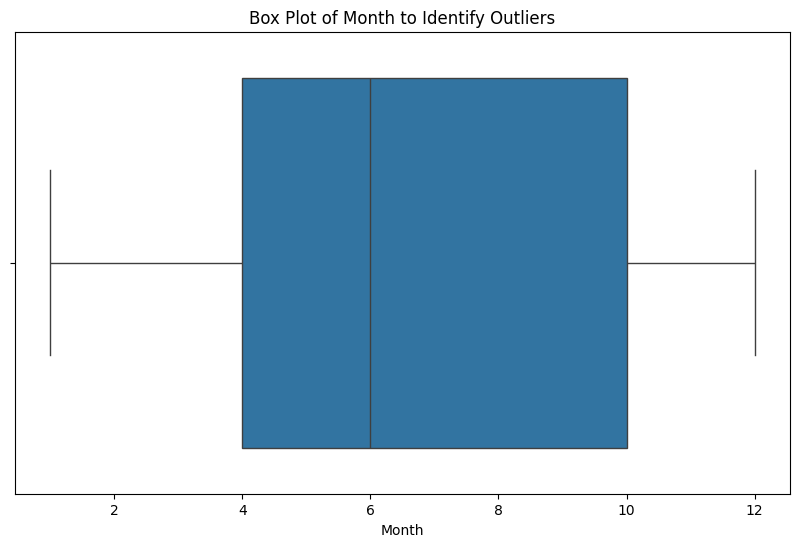

In [86]:
for col in num_col:
    plt.figure(figsize=(4, 2))
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = df, x=col)
    plt.title(f"Box Plot of {col} to Identify Outliers")
    plt.xlabel(col)
    plt.show()

In [87]:
df = df[df['SALE PRICE'] != 0]

In [88]:
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[~((df['SALE PRICE'] > 0) & (df['SALE PRICE'] < 100000))]
df = df[df['SALE PRICE'] < 1e6]

<Figure size 400x200 with 0 Axes>

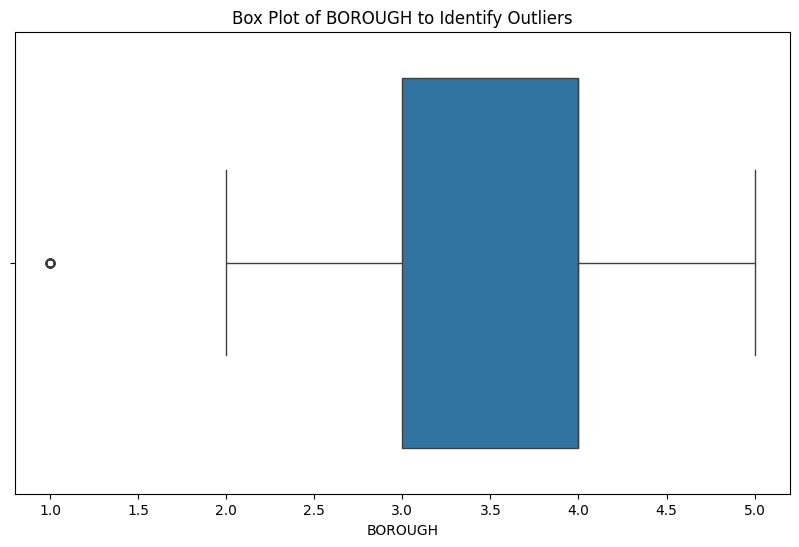

<Figure size 400x200 with 0 Axes>

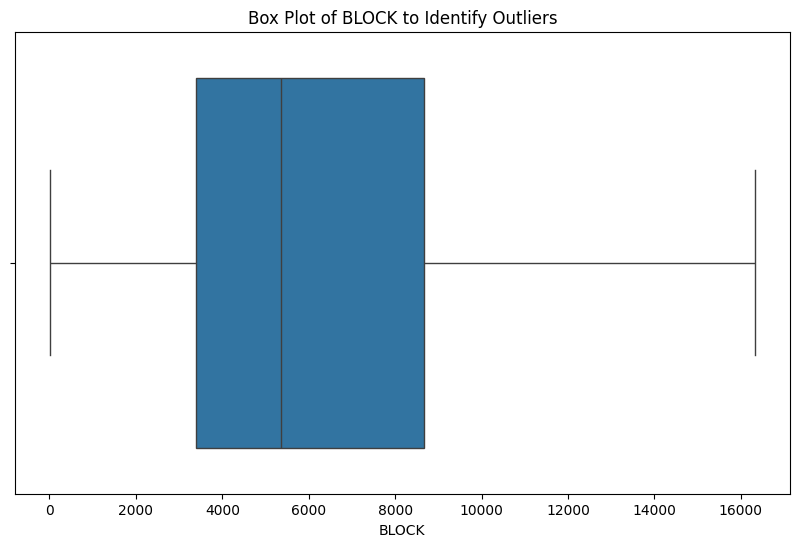

<Figure size 400x200 with 0 Axes>

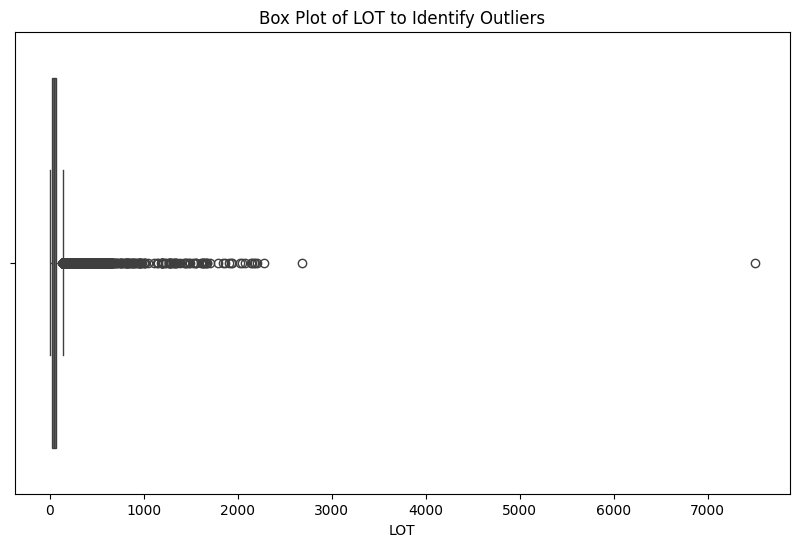

<Figure size 400x200 with 0 Axes>

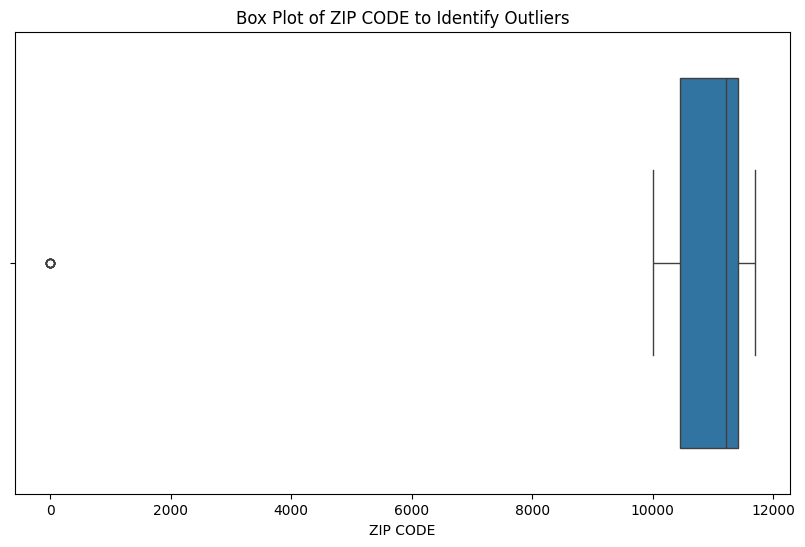

<Figure size 400x200 with 0 Axes>

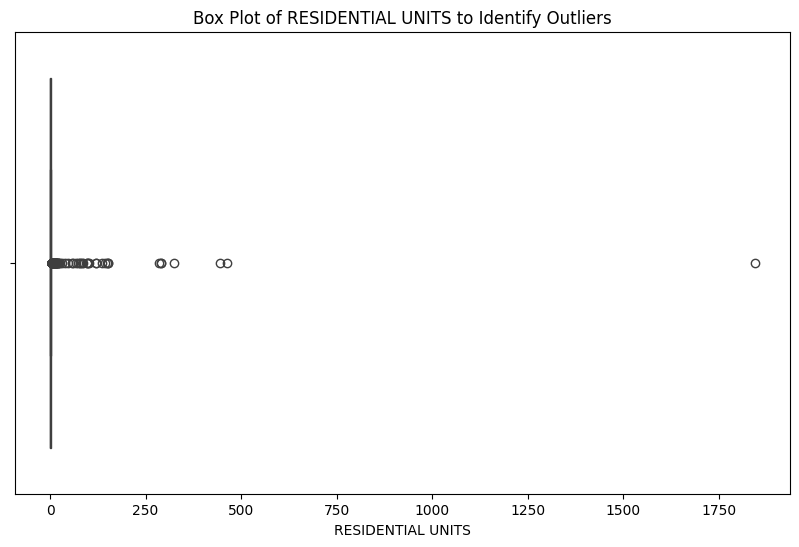

<Figure size 400x200 with 0 Axes>

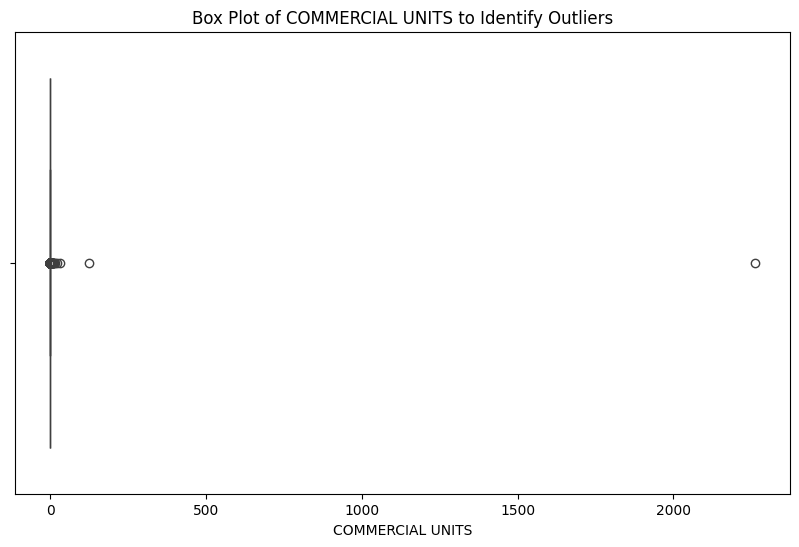

<Figure size 400x200 with 0 Axes>

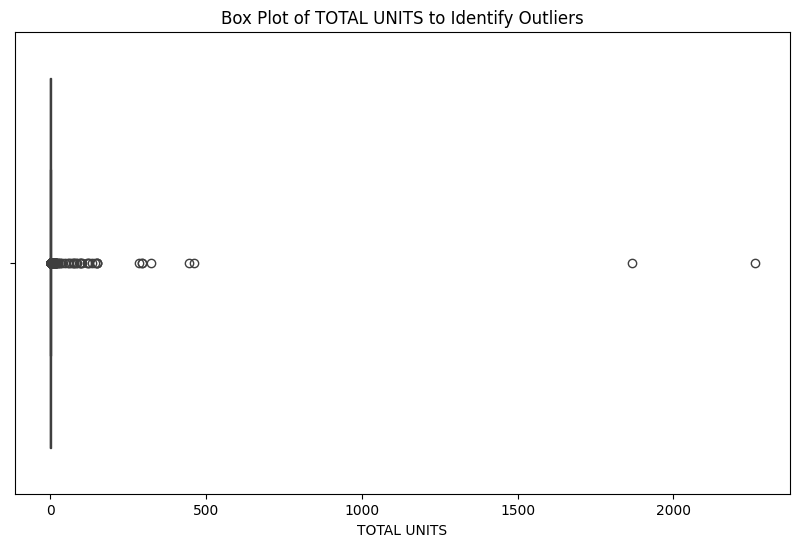

<Figure size 400x200 with 0 Axes>

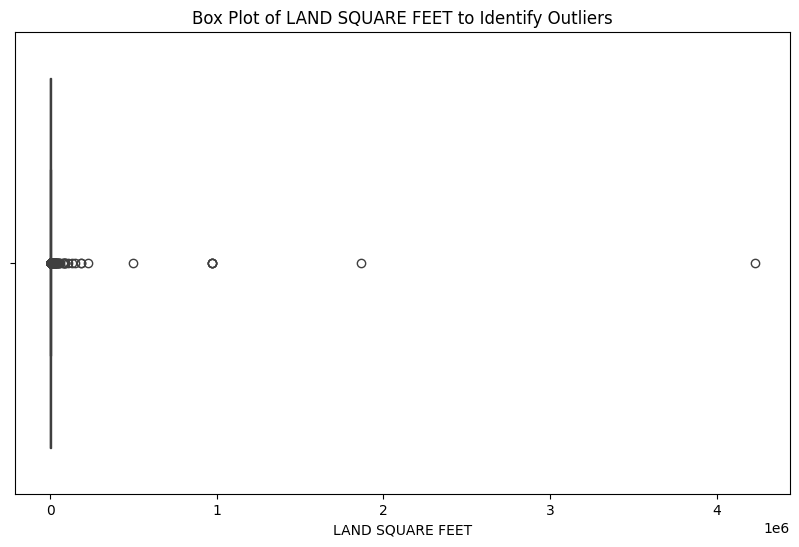

<Figure size 400x200 with 0 Axes>

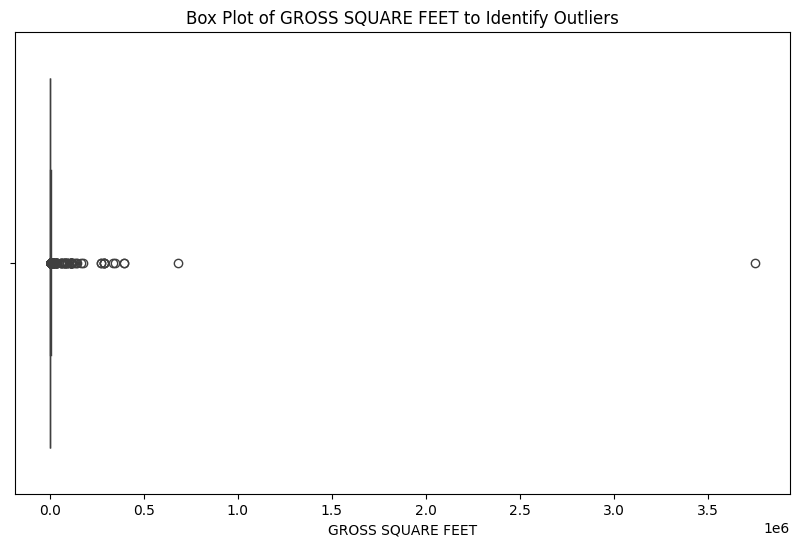

<Figure size 400x200 with 0 Axes>

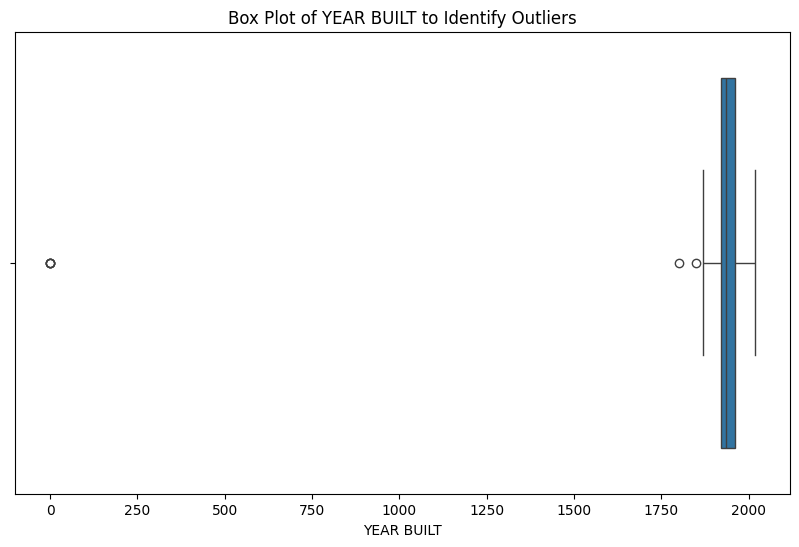

<Figure size 400x200 with 0 Axes>

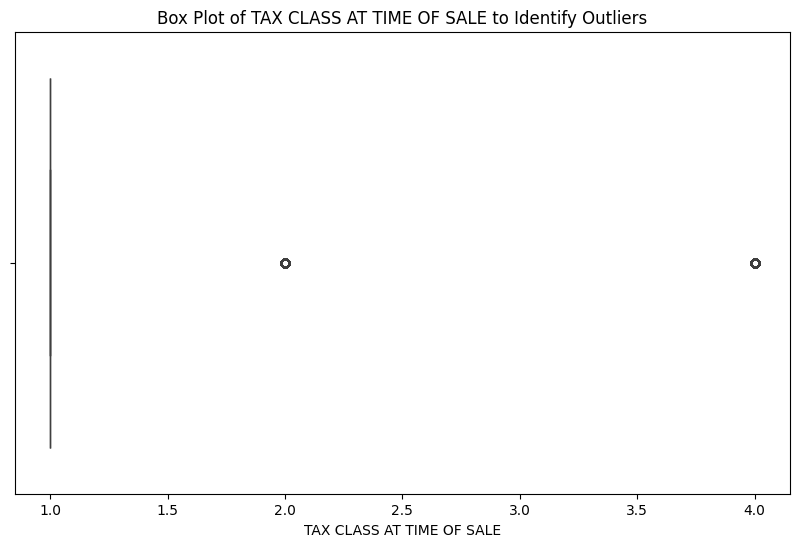

<Figure size 400x200 with 0 Axes>

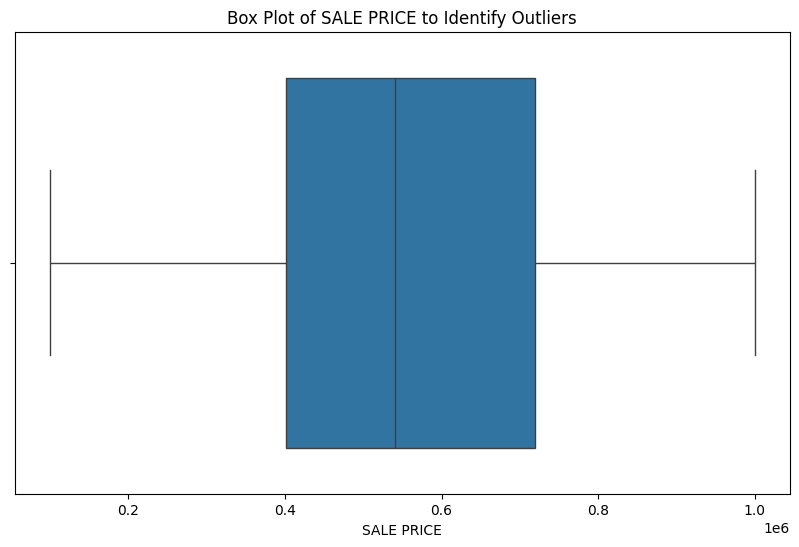

<Figure size 400x200 with 0 Axes>

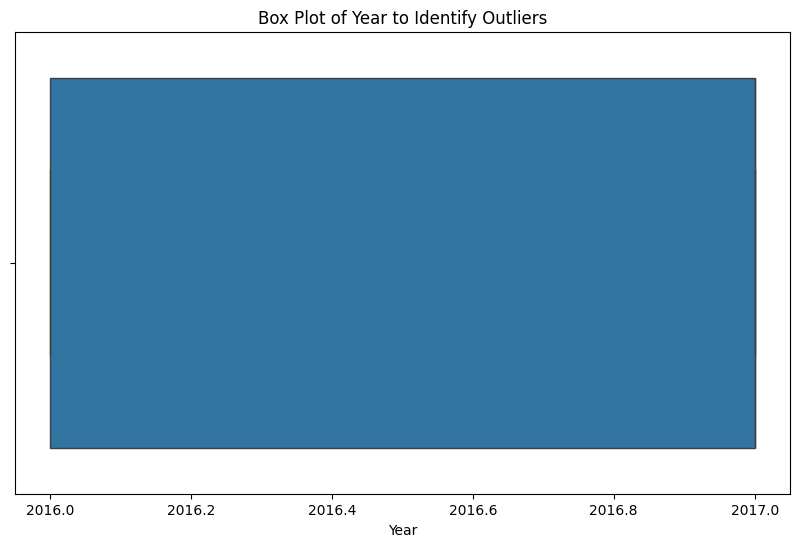

<Figure size 400x200 with 0 Axes>

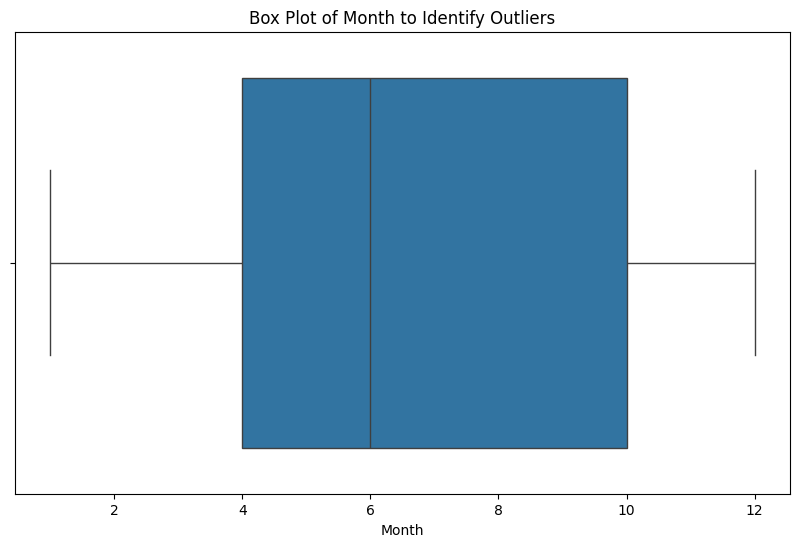

In [89]:
for col in num_col:
    plt.figure(figsize=(4, 2))
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = df, x=col)
    plt.title(f"Box Plot of {col} to Identify Outliers")
    plt.xlabel(col)
    plt.show()

In [90]:
df = df[df['RESIDENTIAL UNITS'] < 4]
df = df[df['COMMERCIAL UNITS'] < 4]
df = df[df['TOTAL UNITS'] < 4]
df = df[df['GROSS SQUARE FEET'] < 5e3]
df = df[df['LAND SQUARE FEET'] < 5e3]
df = df[df['ZIP CODE'] != 0]

In [91]:
most_common = df['YEAR BUILT'].mode().iloc[0]
df['YEAR BUILT'] = df['YEAR BUILT'].replace(0, most_common)

In [92]:
df.shape

(18968, 21)

<Figure size 400x200 with 0 Axes>

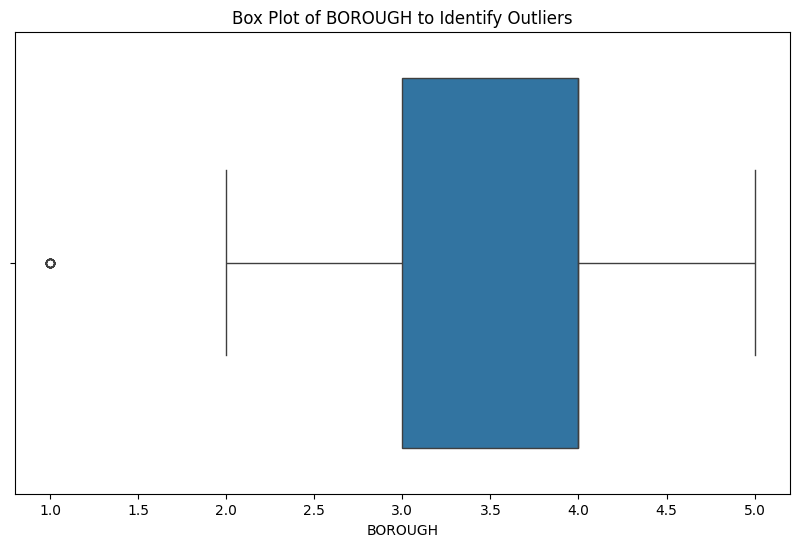

<Figure size 400x200 with 0 Axes>

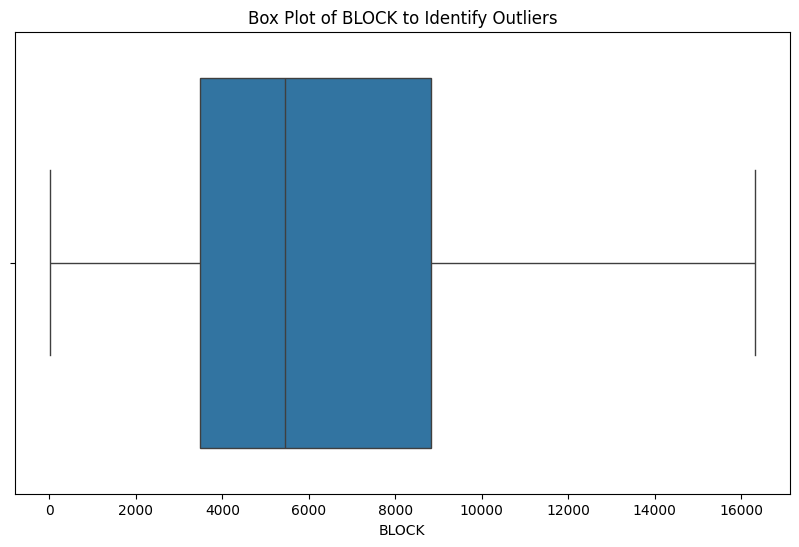

<Figure size 400x200 with 0 Axes>

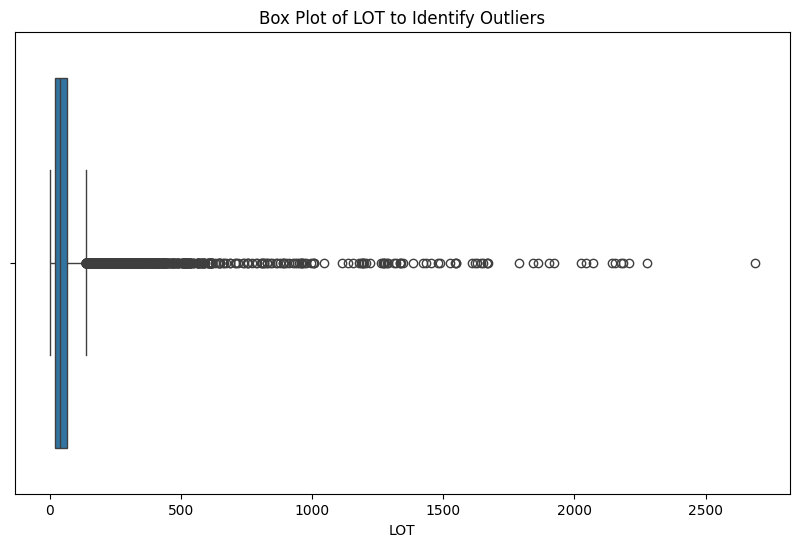

<Figure size 400x200 with 0 Axes>

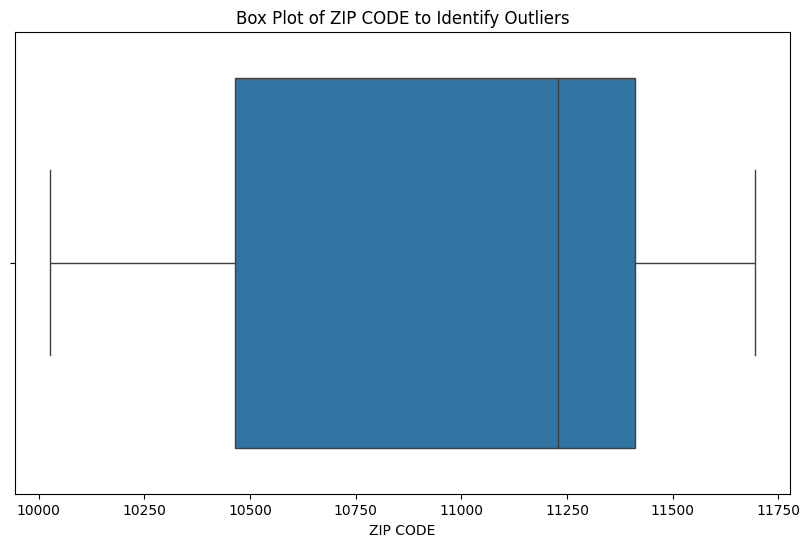

<Figure size 400x200 with 0 Axes>

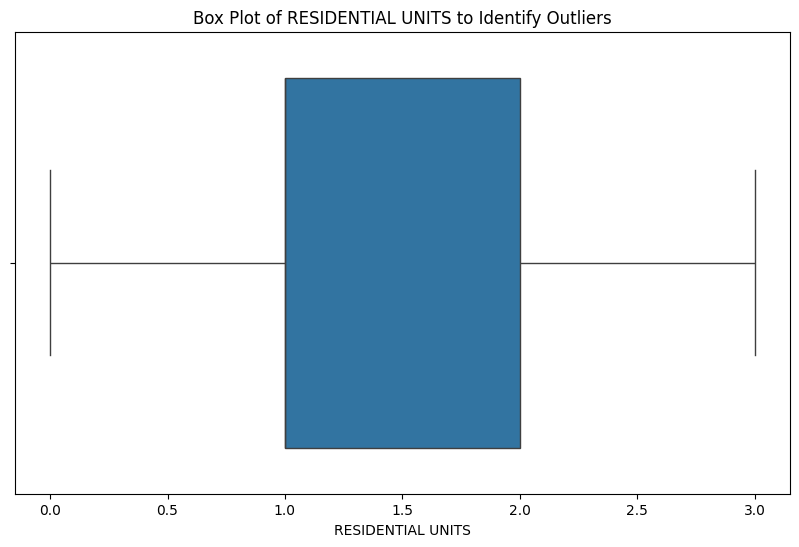

<Figure size 400x200 with 0 Axes>

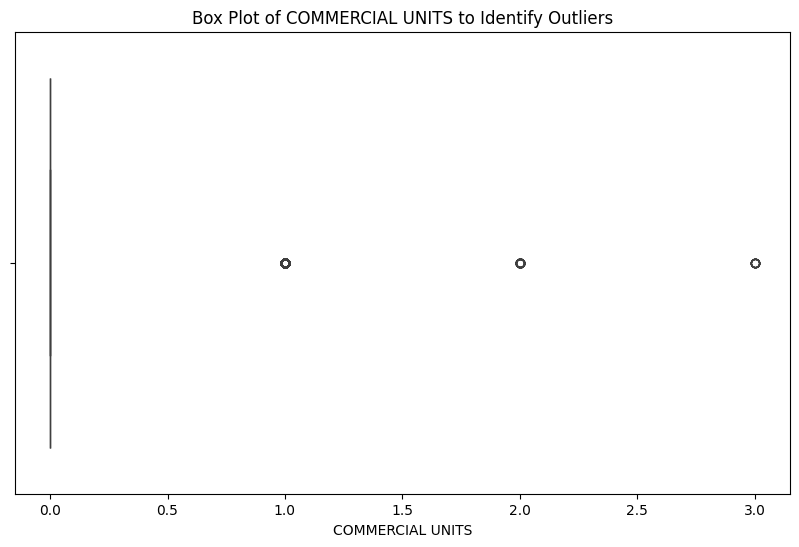

<Figure size 400x200 with 0 Axes>

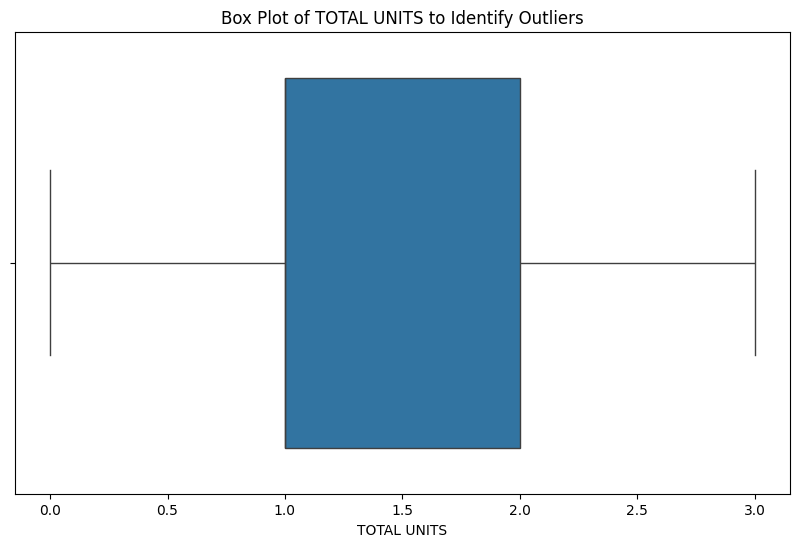

<Figure size 400x200 with 0 Axes>

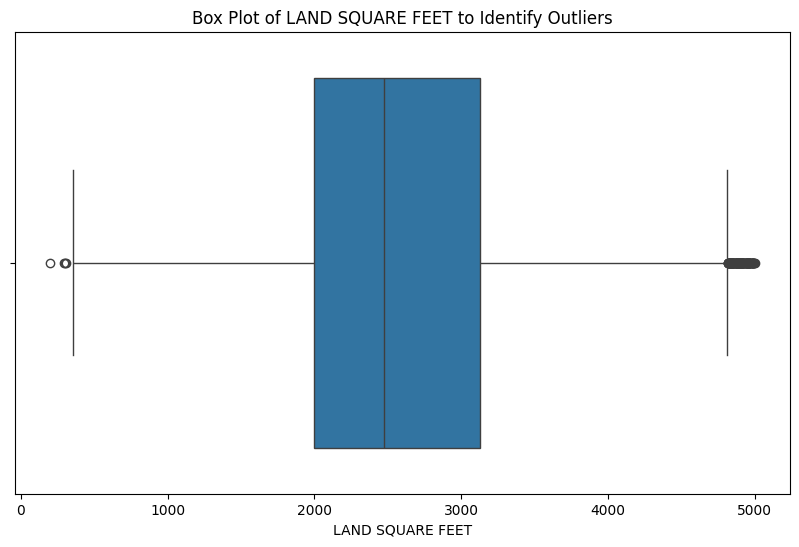

<Figure size 400x200 with 0 Axes>

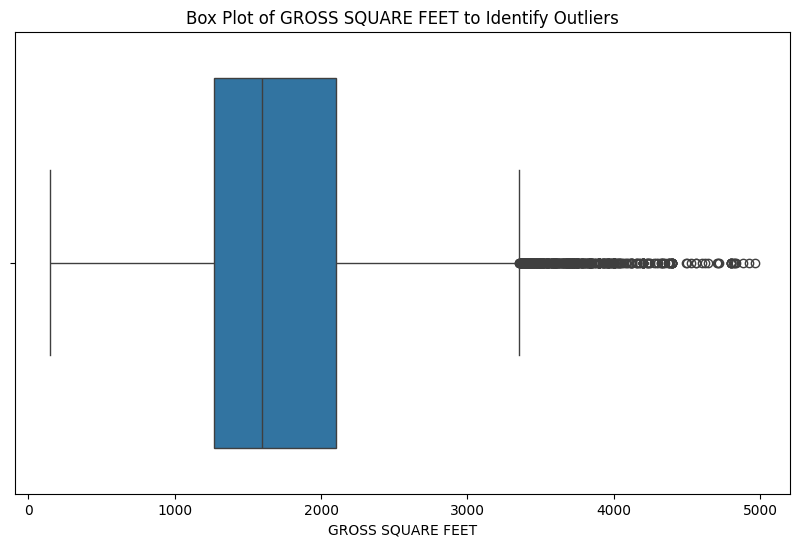

<Figure size 400x200 with 0 Axes>

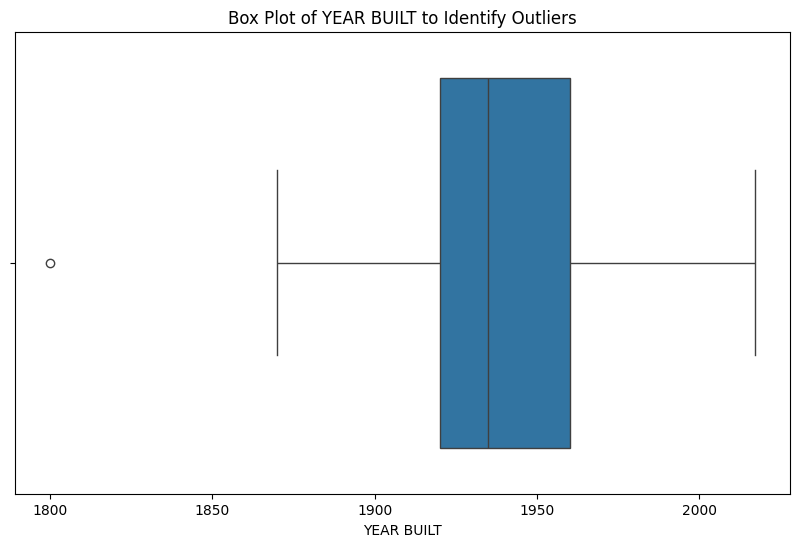

<Figure size 400x200 with 0 Axes>

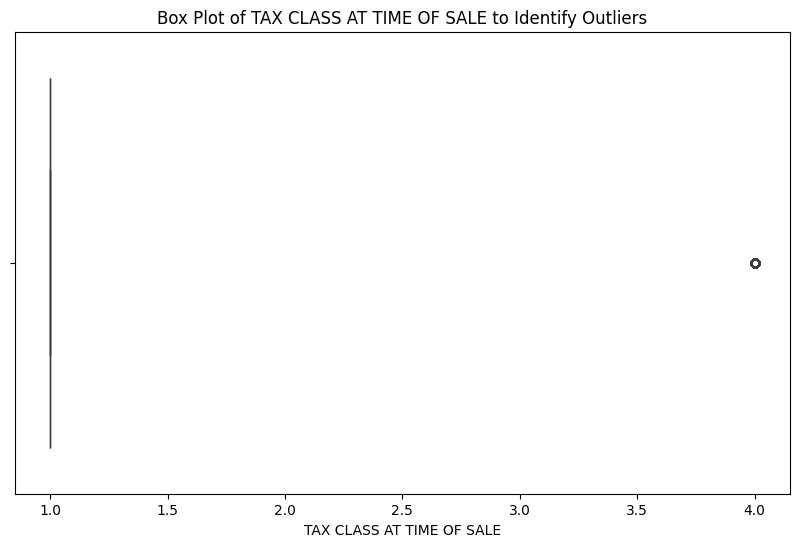

<Figure size 400x200 with 0 Axes>

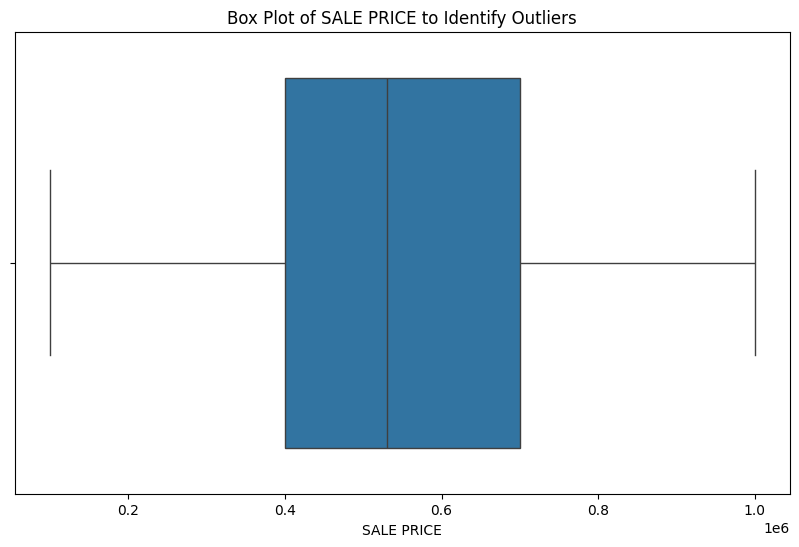

<Figure size 400x200 with 0 Axes>

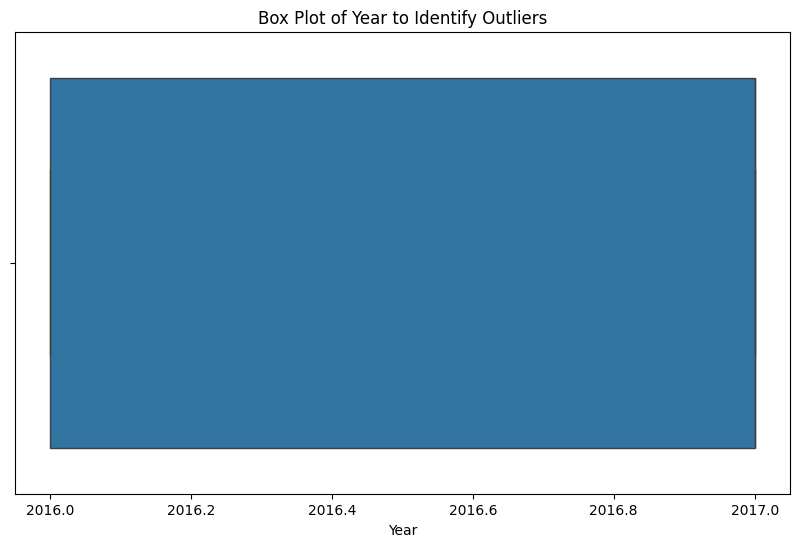

<Figure size 400x200 with 0 Axes>

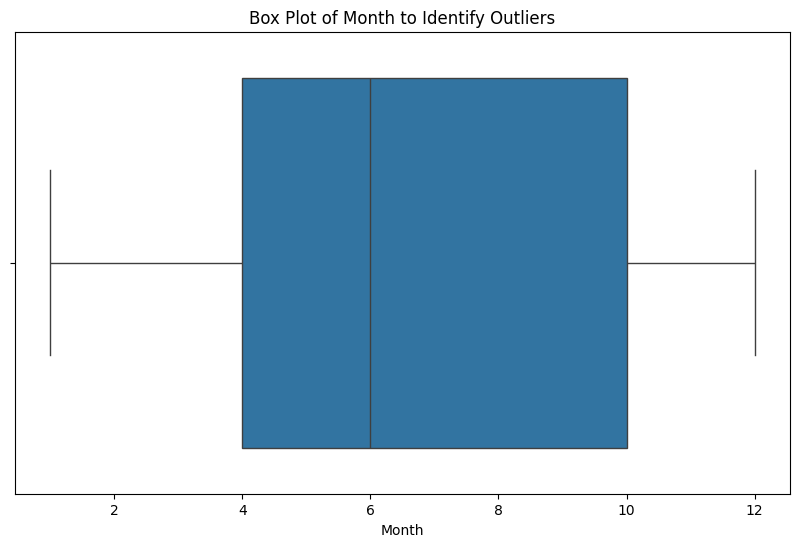

In [93]:
for col in num_col:
    plt.figure(figsize=(4, 2))
    plt.figure(figsize=(10, 6))
    sns.boxplot(data = df, x=col)
    plt.title(f"Box Plot of {col} to Identify Outliers")
    plt.xlabel(col)
    plt.show()

In [94]:
df['BOROUGH_NAME'] = df['BOROUGH'].astype(str)
df['BOROUGH_NAME'].replace({'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'}, inplace=True)
df['GROSS SQUARE FEET binned'] = pd.qcut(df['GROSS SQUARE FEET'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['LAND SQUARE FEET binned'] = pd.qcut(df['LAND SQUARE FEET'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['TOTAL SQUARE FEET'] = df['LAND SQUARE FEET'] + df['GROSS SQUARE FEET']
df['TOTAL SQUARE FEET binned'] = pd.qcut(df['TOTAL SQUARE FEET'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df['GROSS SQUARE FEET PRICE AVG'] = df['SALE PRICE'].mean() / df['GROSS SQUARE FEET']
df['LAND SQUARE FEET PRICE AVG'] = df['SALE PRICE'].mean() / df['LAND SQUARE FEET']
df['TOTAL SQUARE FEET PRICE AVG'] = df['SALE PRICE'].mean() / df['TOTAL SQUARE FEET']

df['SALE PRICE IN M'] = df['SALE PRICE'].astype(np.float32) / 1_000_000
df['UNIQUE UNITS'] = (df['RESIDENTIAL UNITS'] == df['TOTAL UNITS']).astype(np.int16)


<ipython-input-94-2e3fee1817e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BOROUGH_NAME'].replace({'1': 'Manhattan', '2': 'Bronx', '3': 'Brooklyn', '4': 'Queens', '5': 'Staten Island'}, inplace=True)


In [95]:
df.shape

(18968, 31)

In [96]:
df.isnull().mean()*100

BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
Year                              0.0
Month                             0.0
BOROUGH_NAME                      0.0
GROSS SQUARE FEET binned          0.0
LAND SQUARE FEET binned           0.0
TOTAL SQUARE FEET                 0.0
TOTAL SQUARE FEET binned          0.0
GROSS SQUARE FEET PRICE AVG       0.0
LAND SQUARE FEET PRICE AVG        0.0
TOTAL SQUARE FEET PRICE AVG       0.0
SALE PRICE IN M                   0.0
UNIQUE UNITS                      0.0
dtype: float64

In [97]:
df.shape

(18968, 31)

In [98]:
num_col = df.select_dtypes(['int16','float32','int8','float64']).columns
cat_col = df.select_dtypes(['category','object']).columns
date_col=['SALE DATE','year','month']

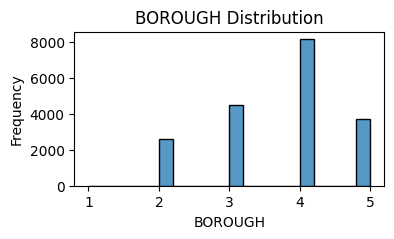

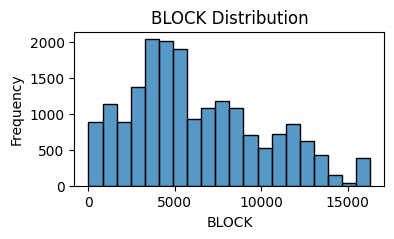

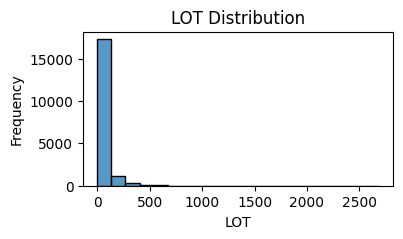

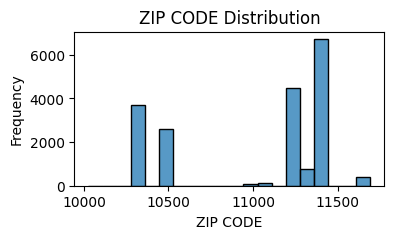

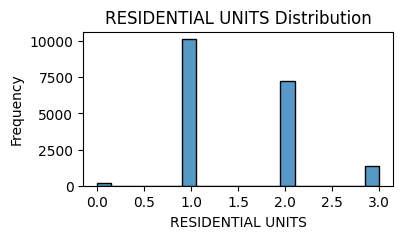

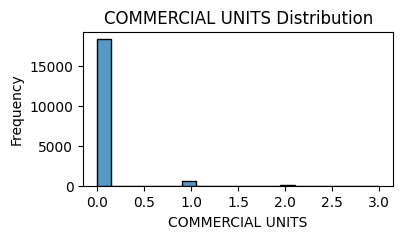

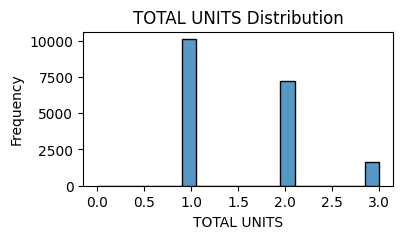

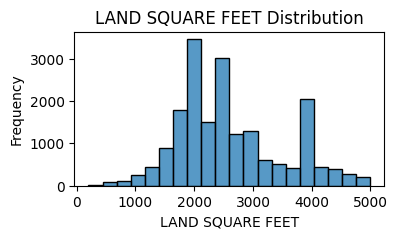

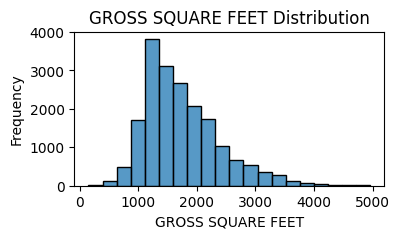

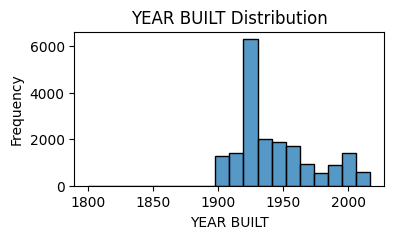

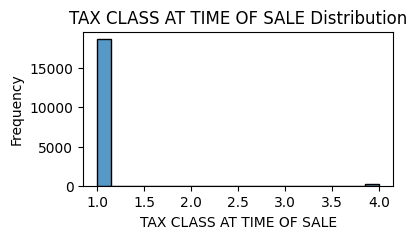

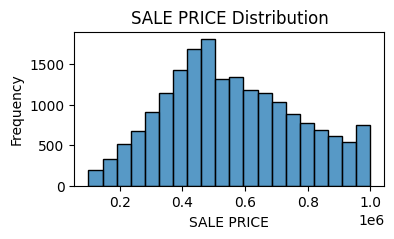

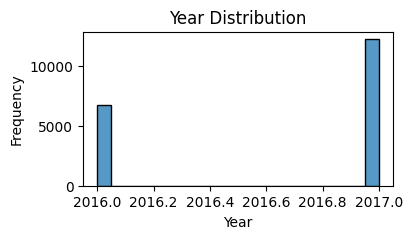

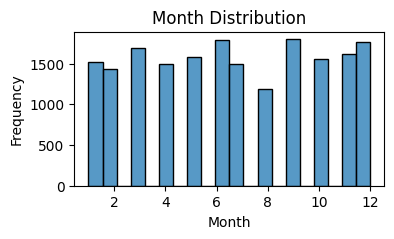

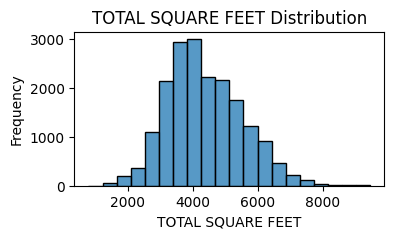

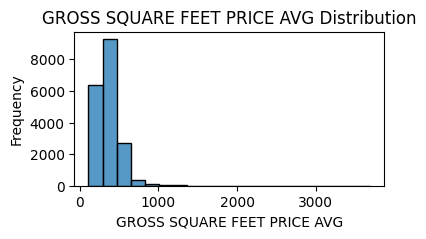

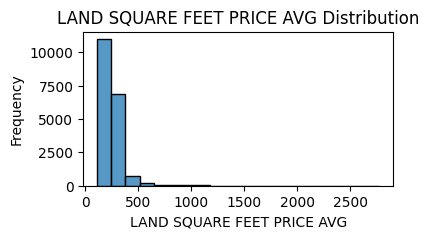

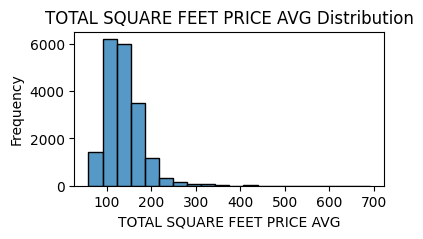

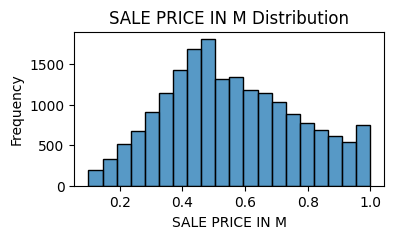

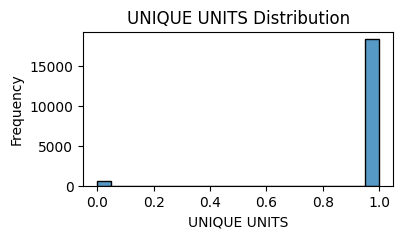

In [99]:
for col in num_col:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

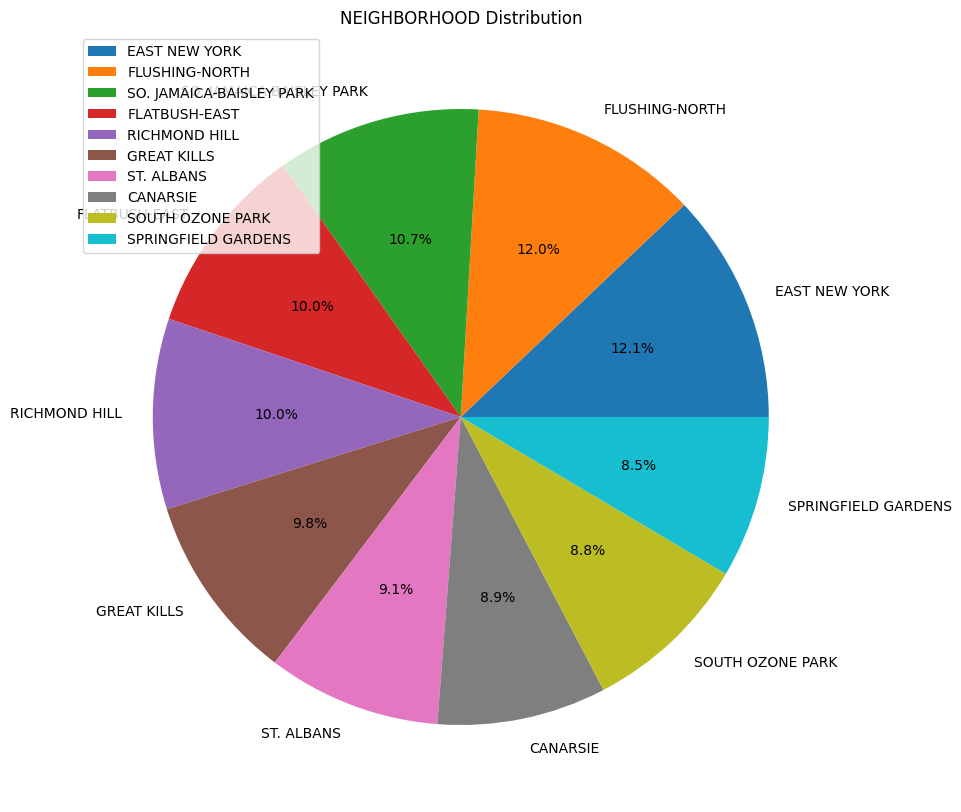

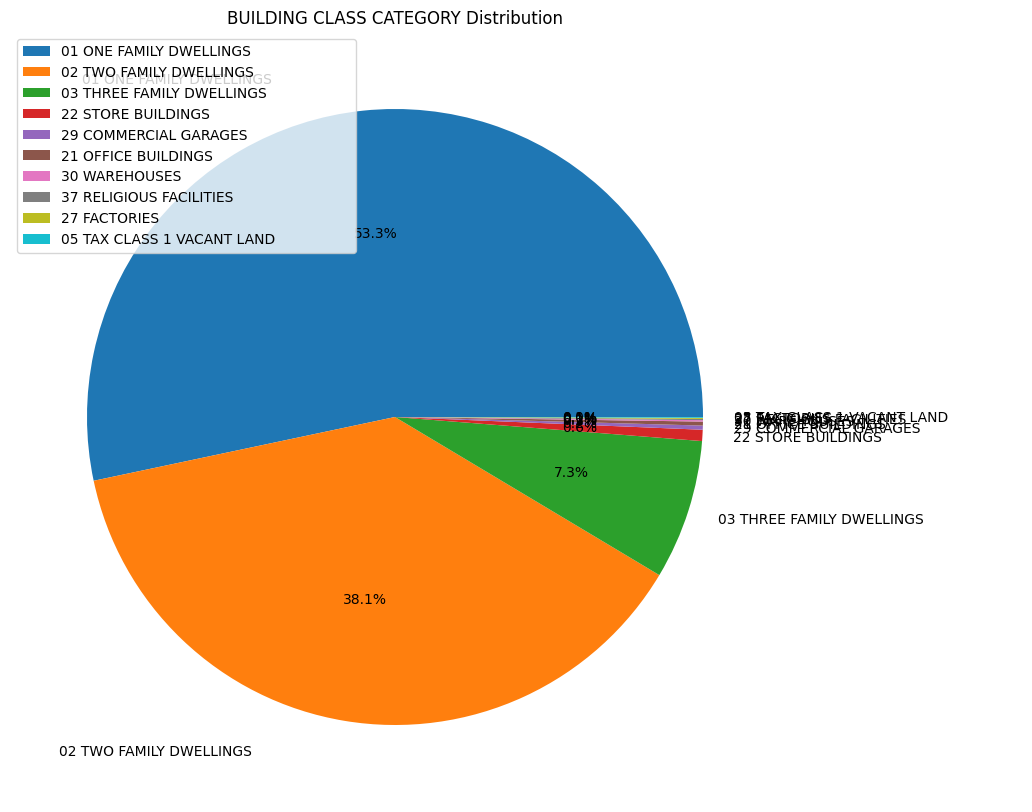

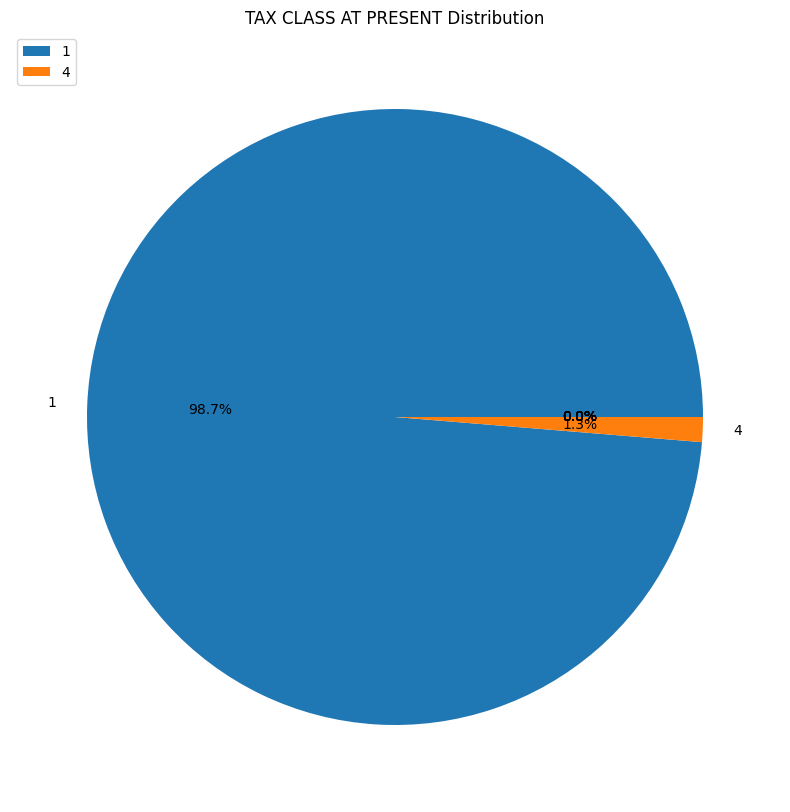

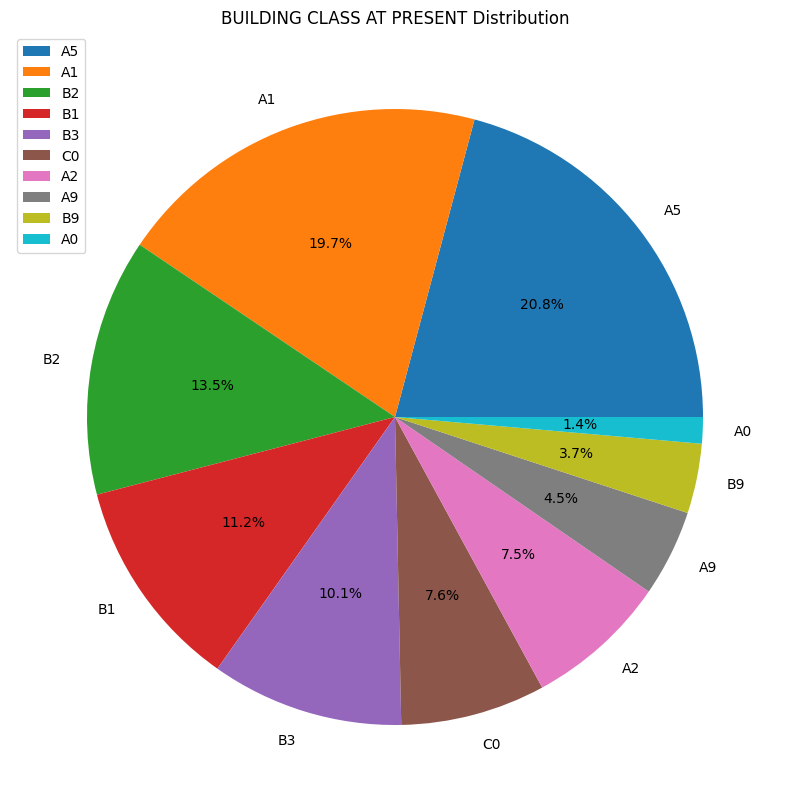

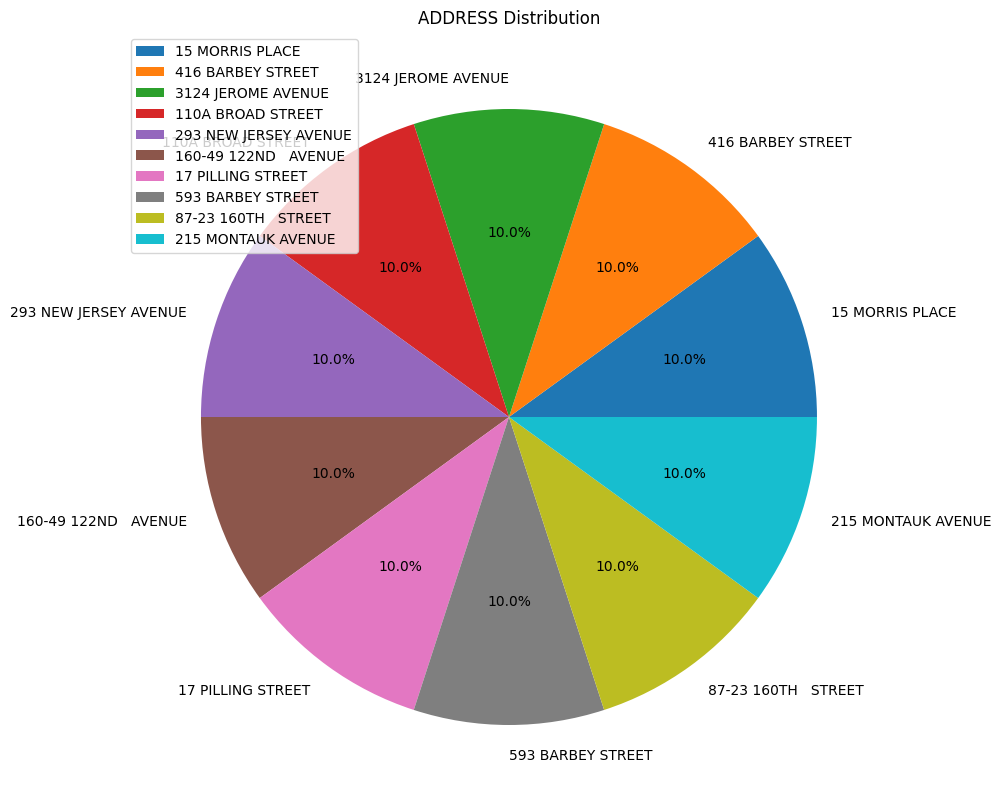

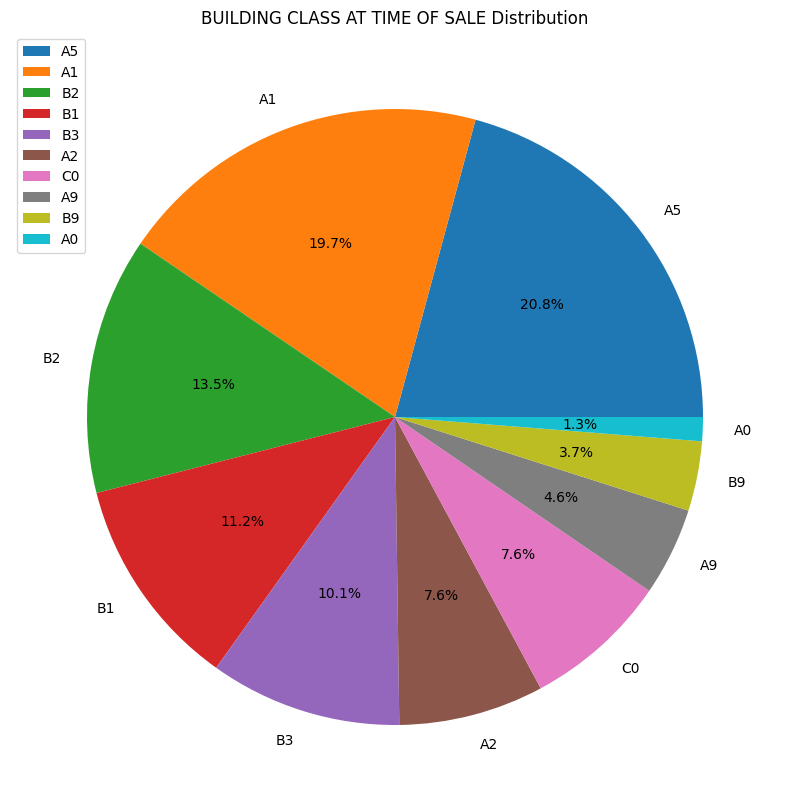

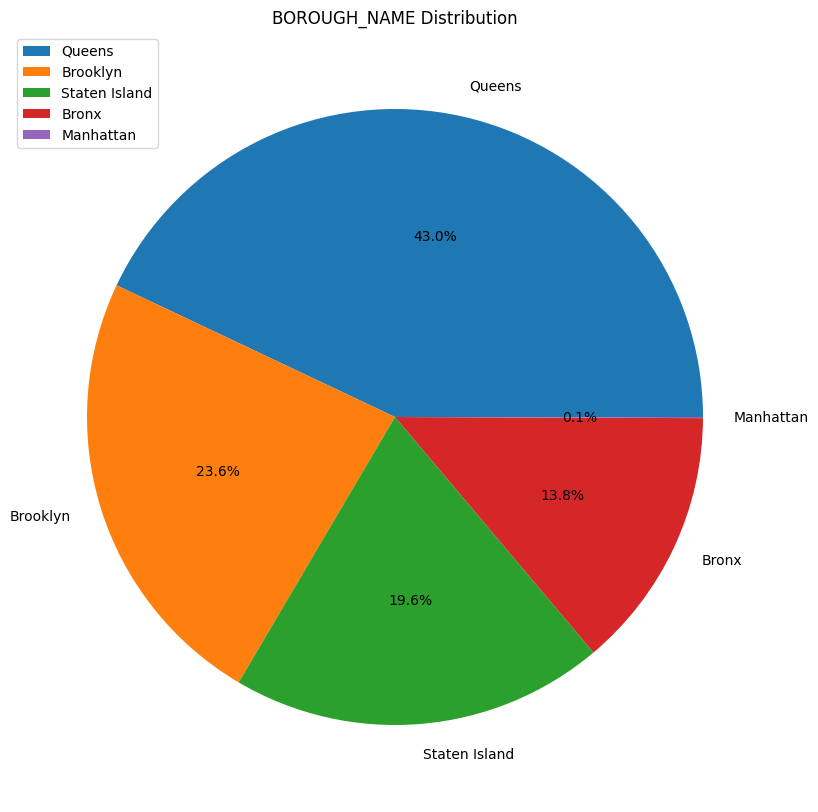

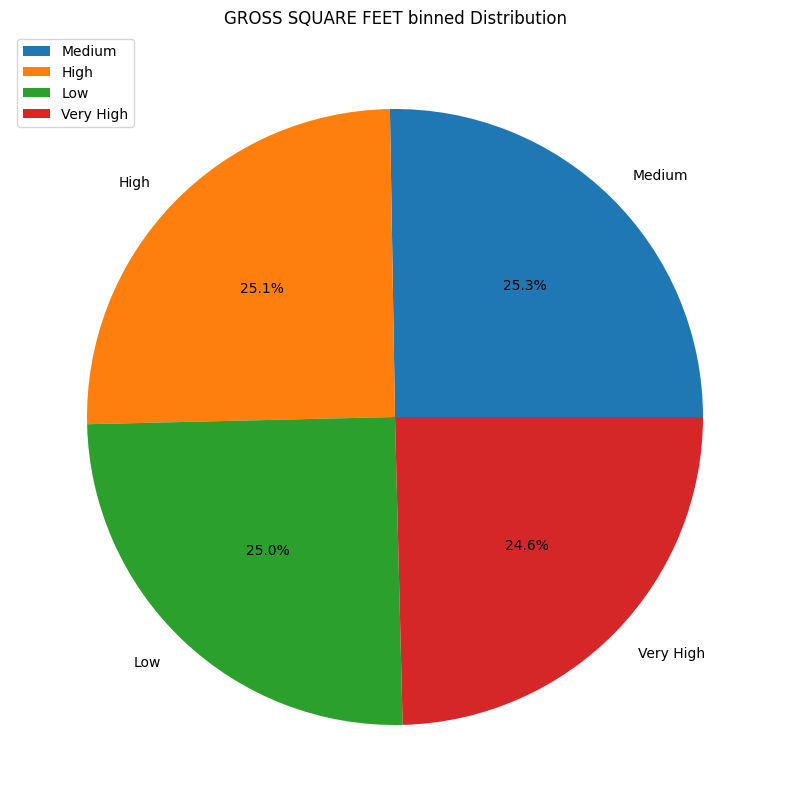

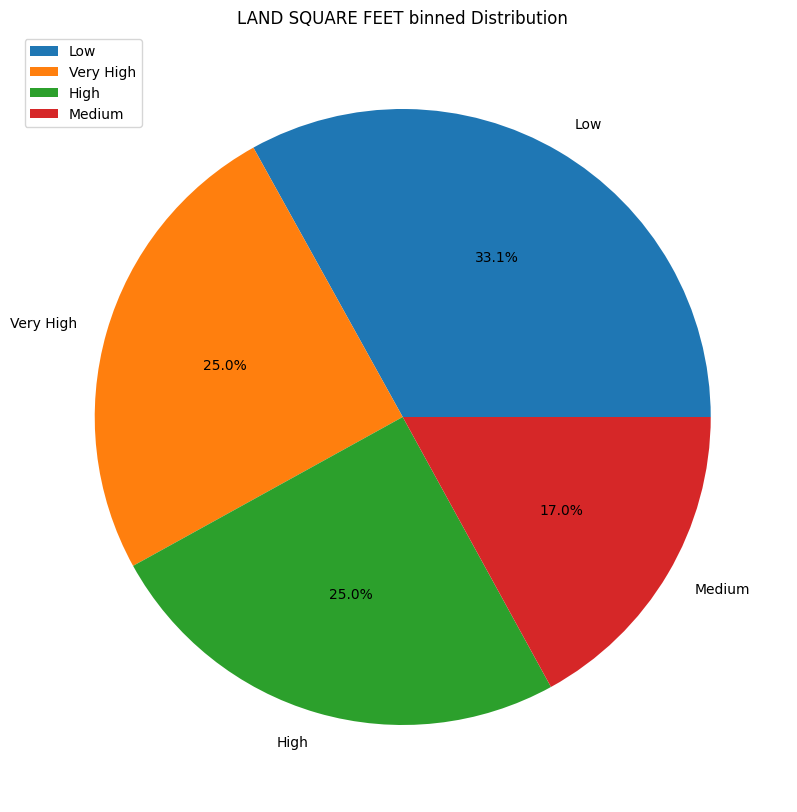

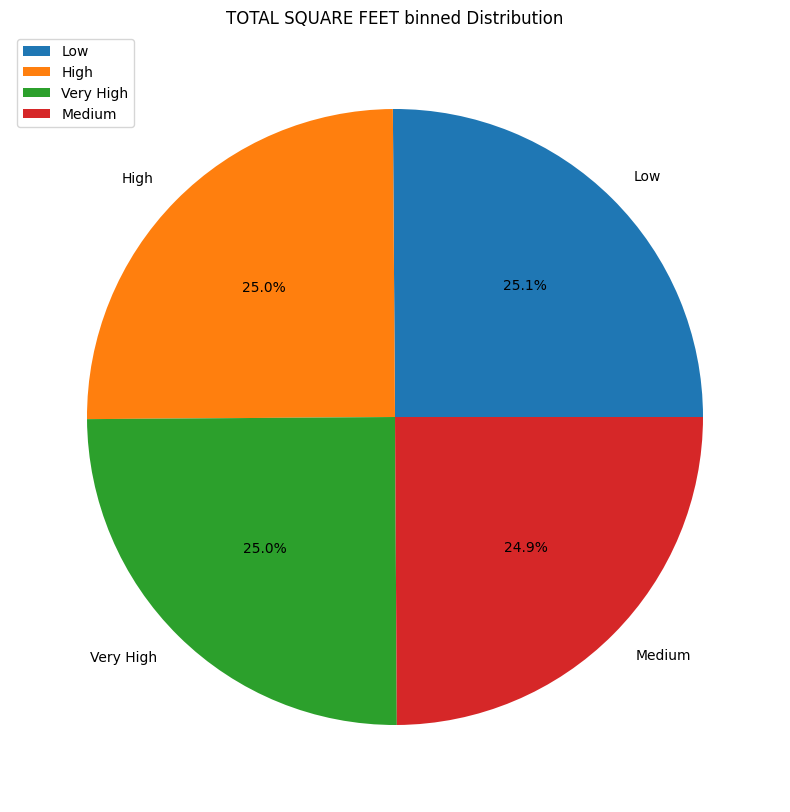

In [100]:
for col in cat_col:
    plt.figure(figsize=(10, 10))
    df[col].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')
    plt.legend(loc='upper left')
    plt.show()

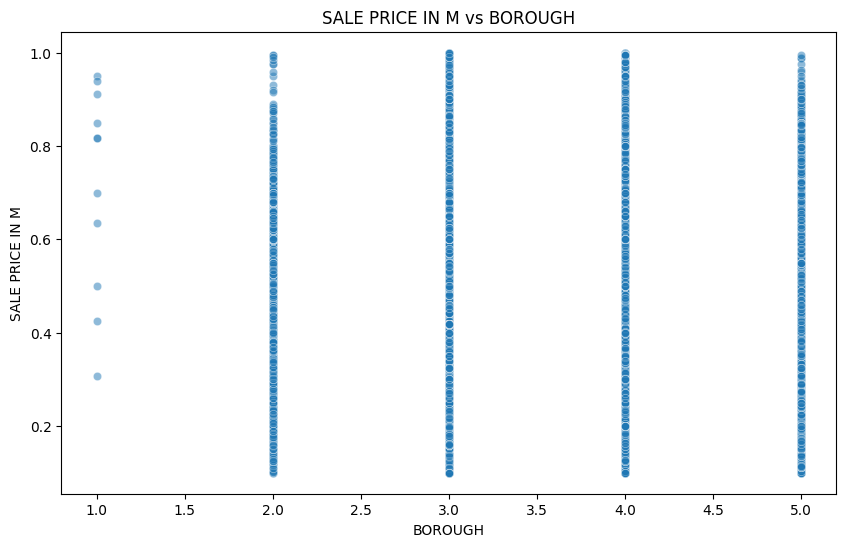

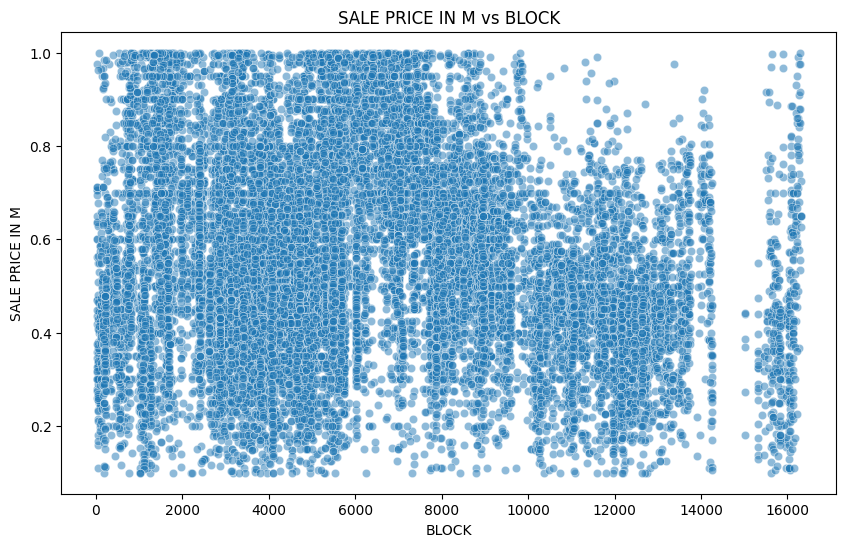

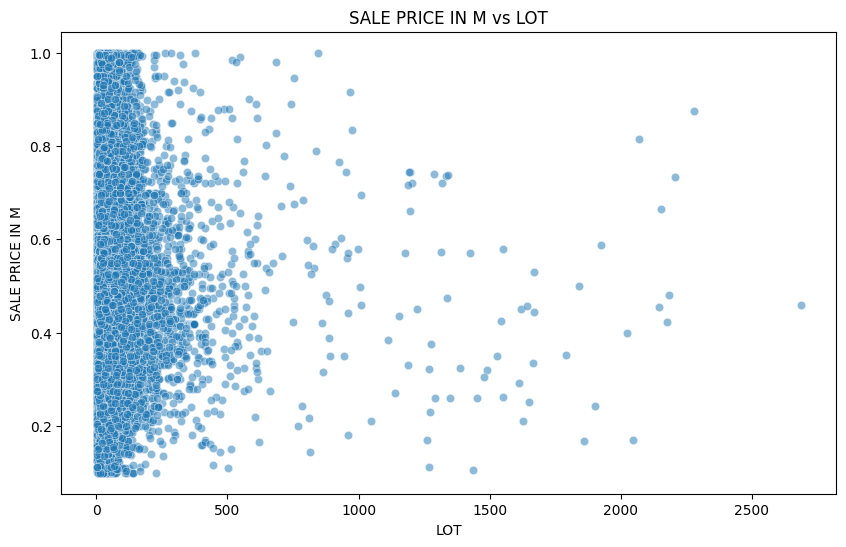

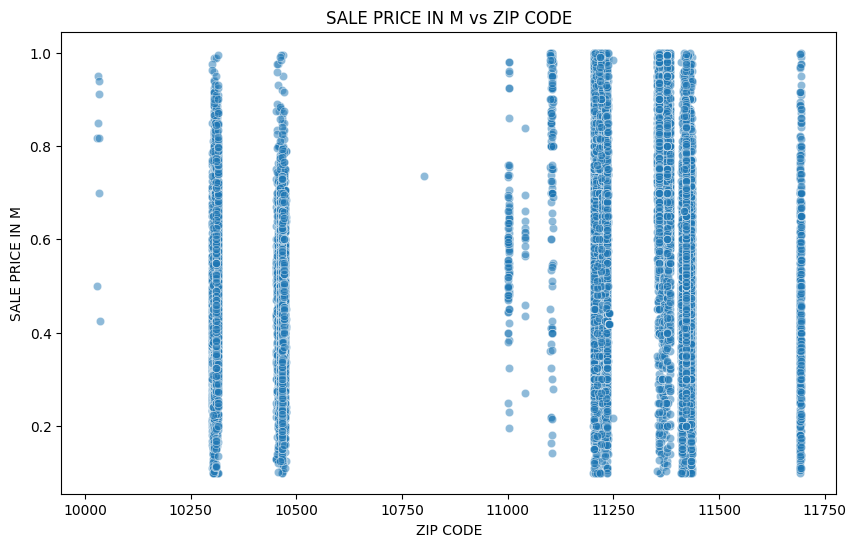

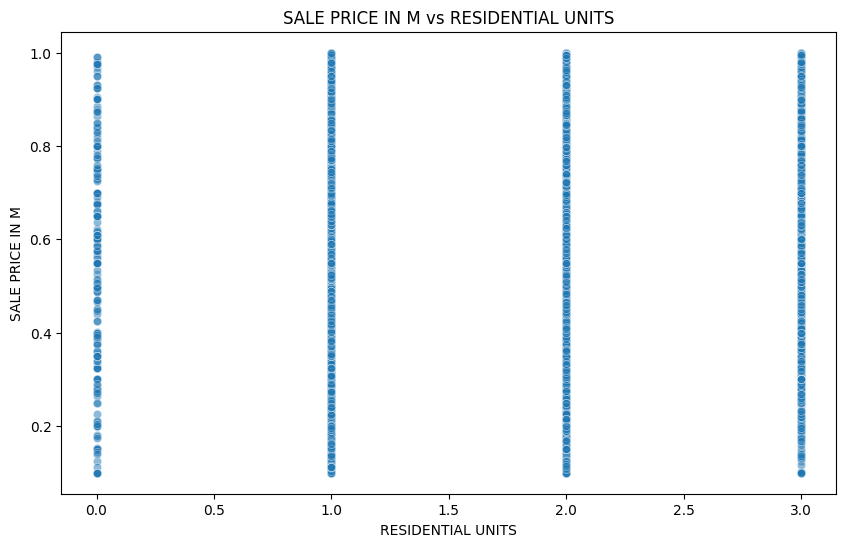

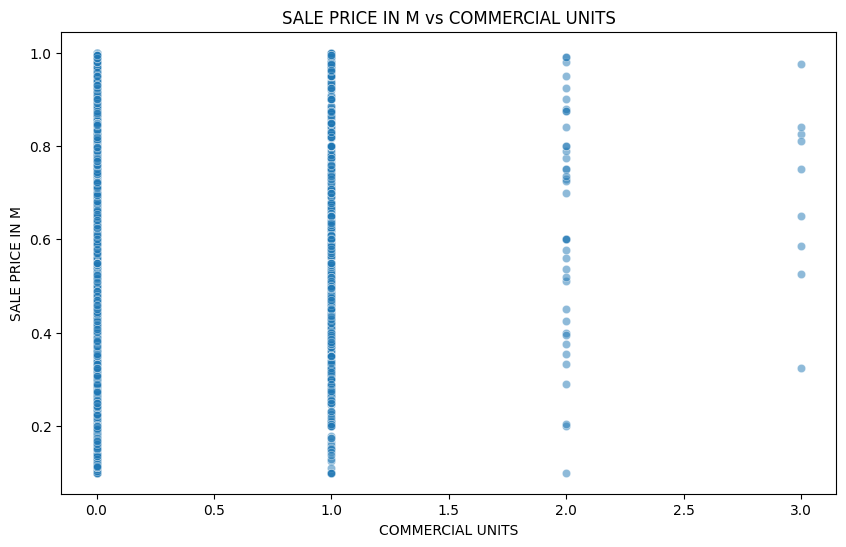

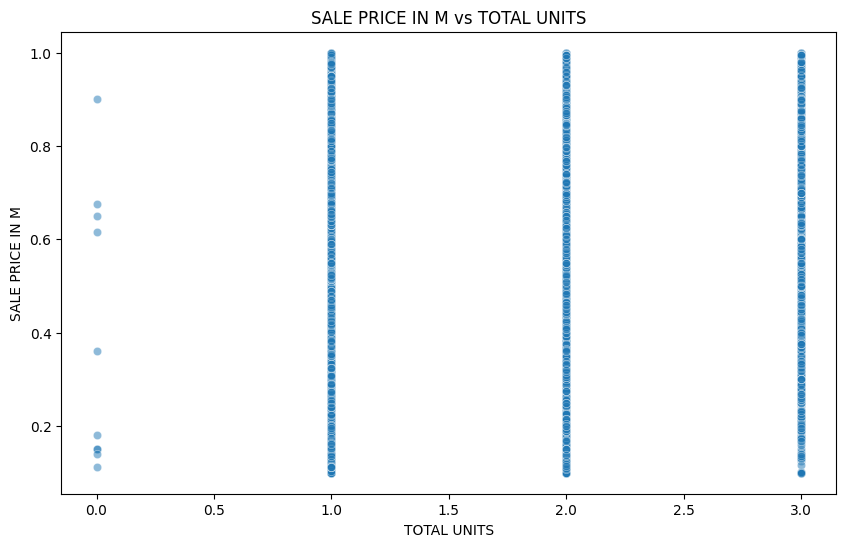

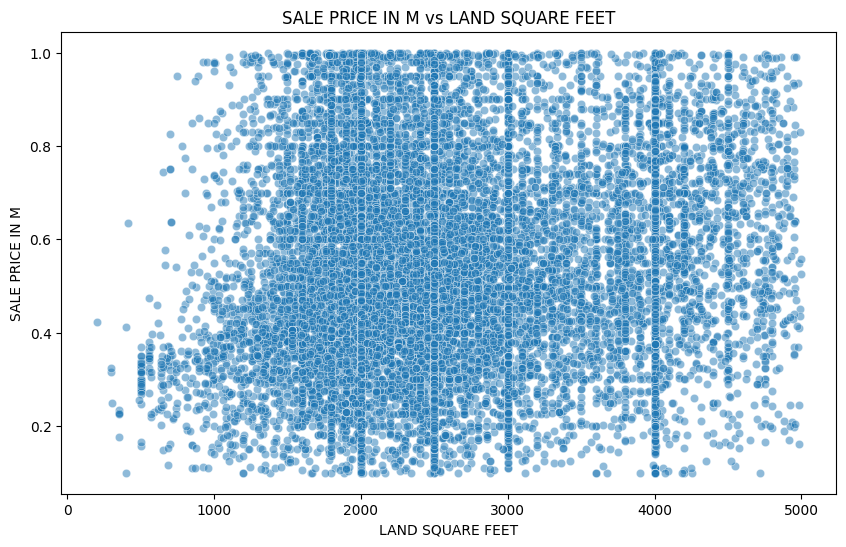

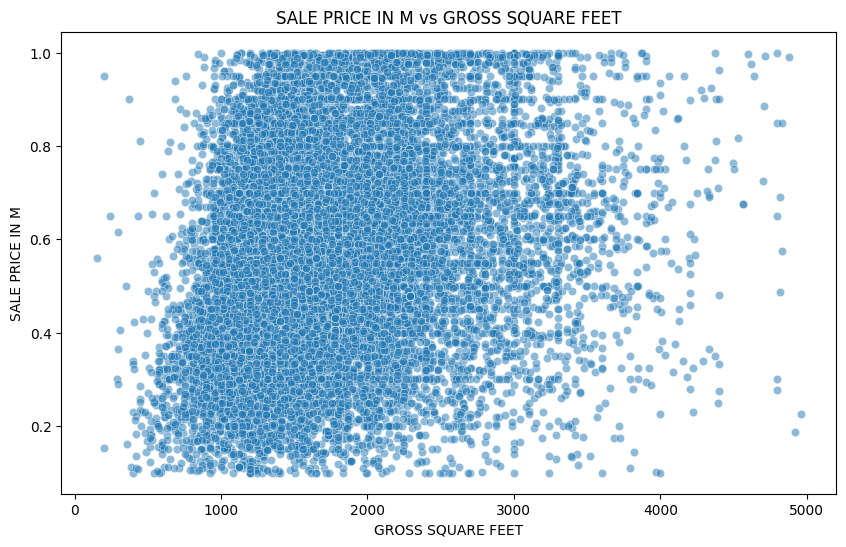

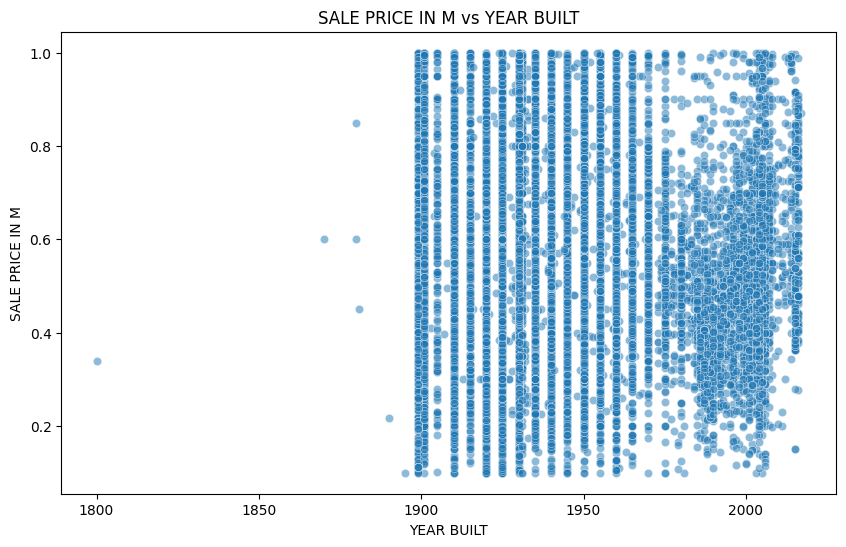

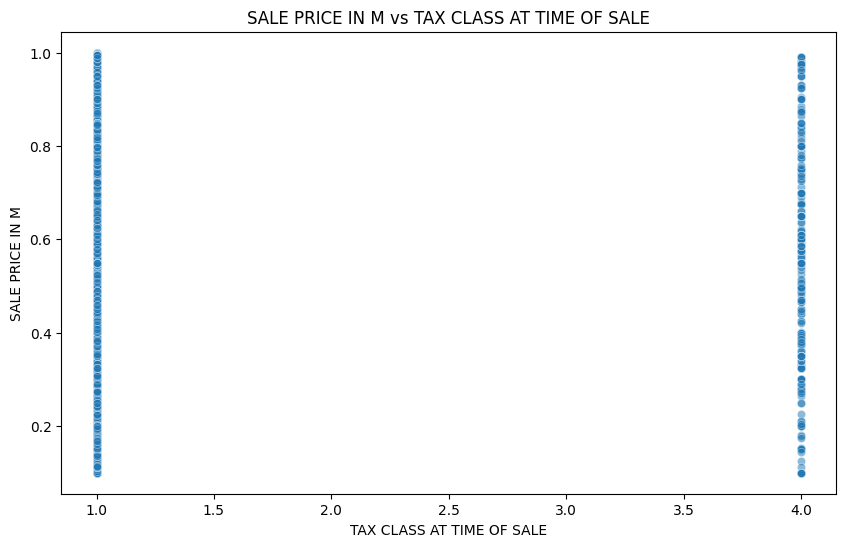

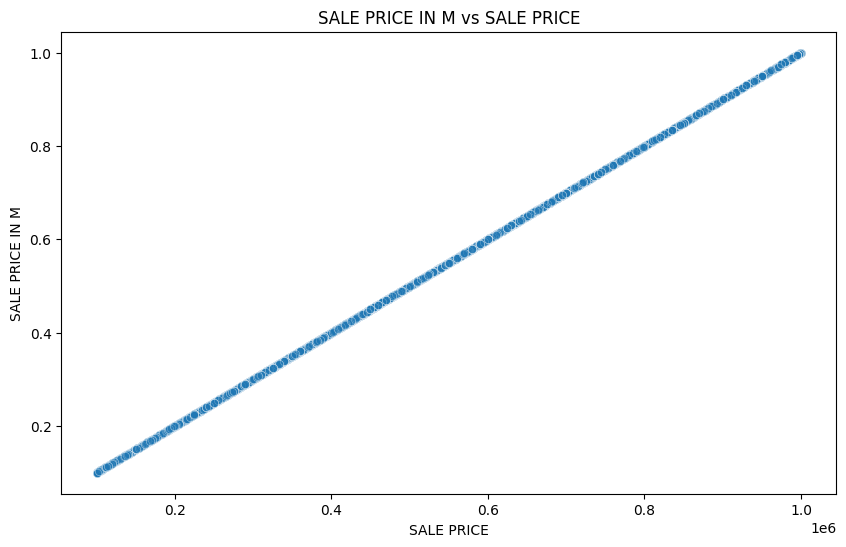

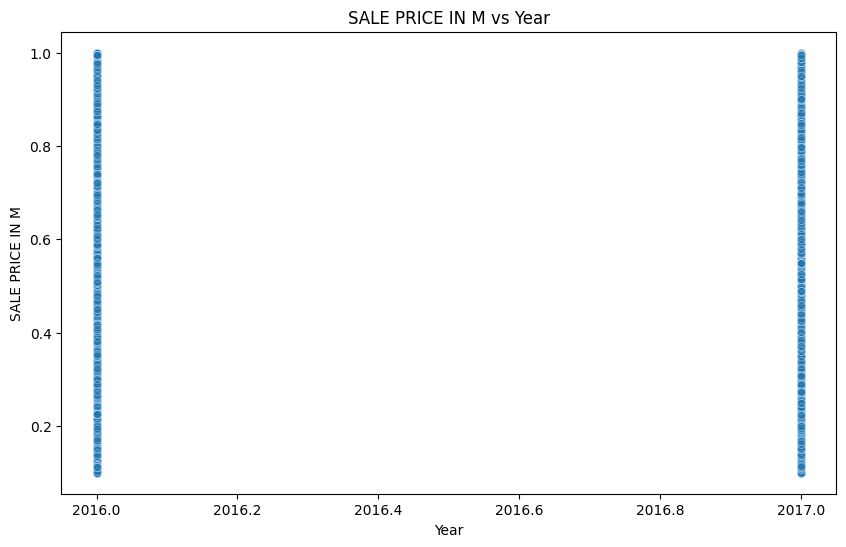

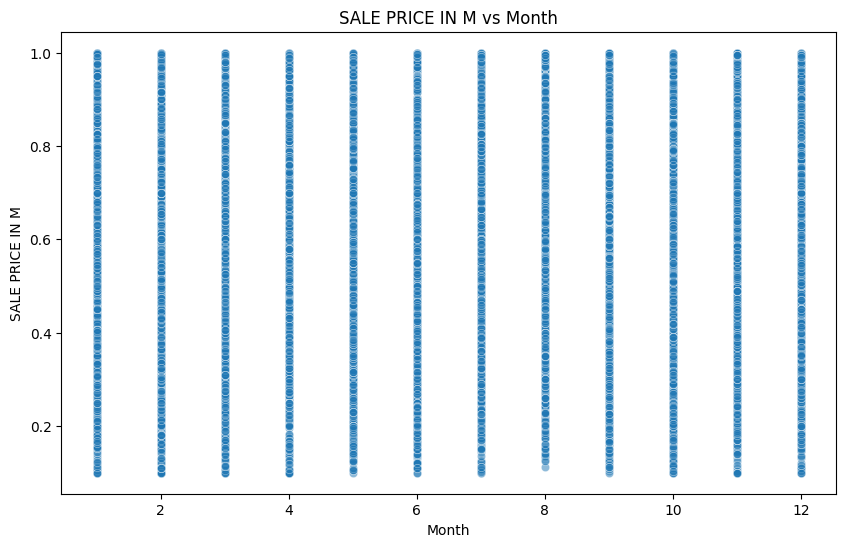

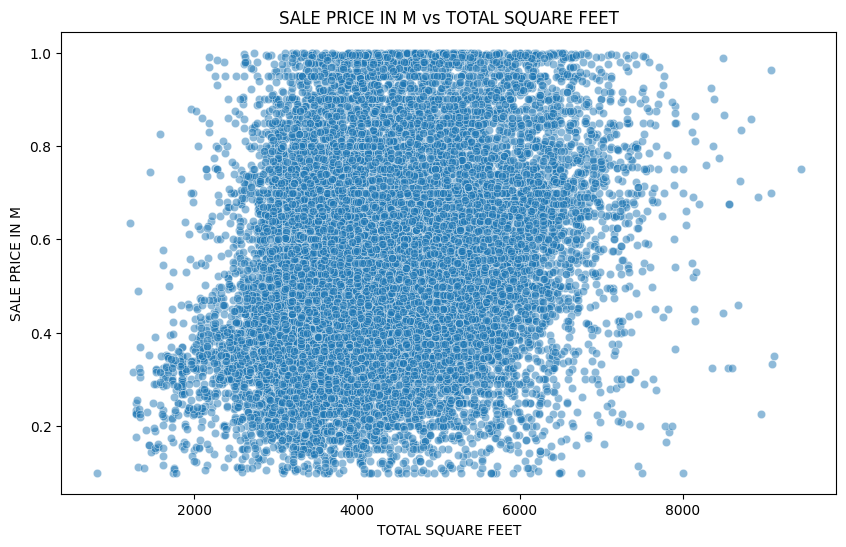

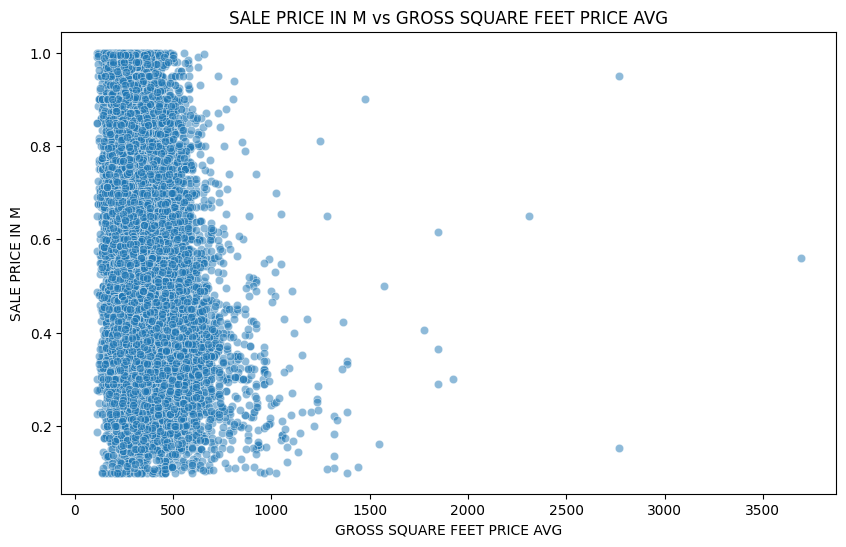

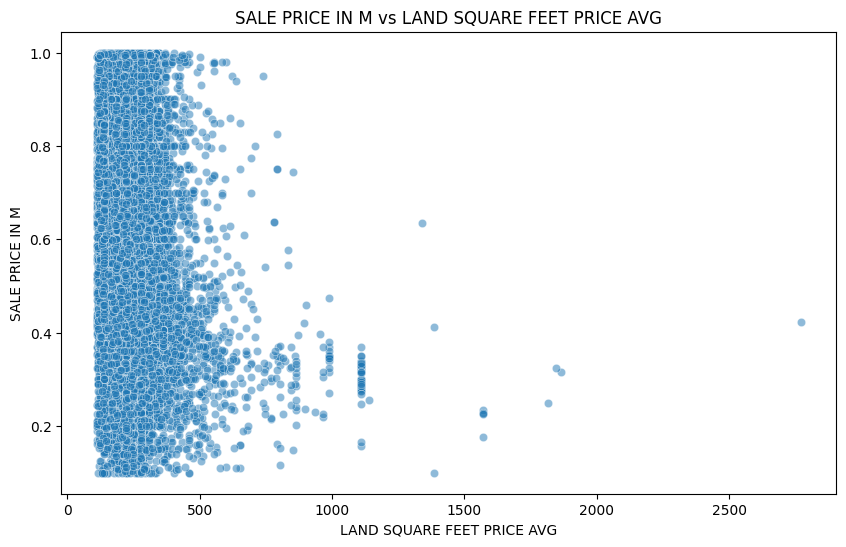

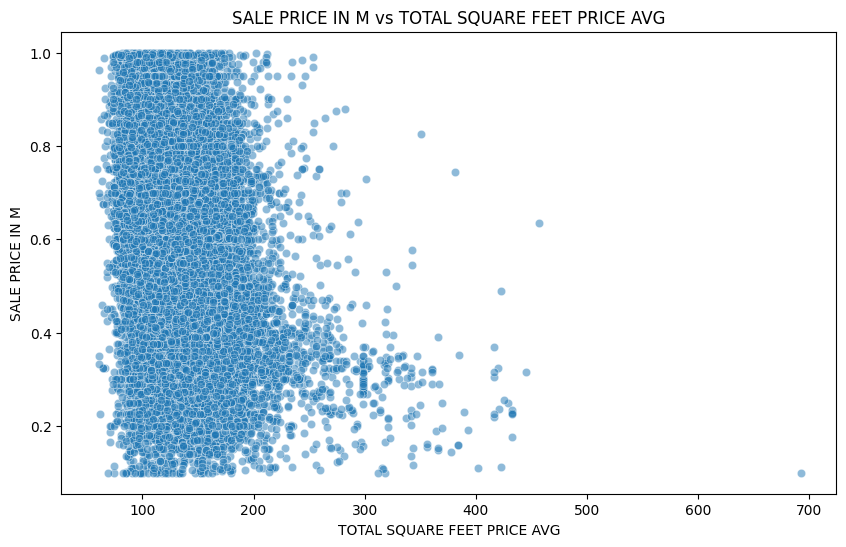

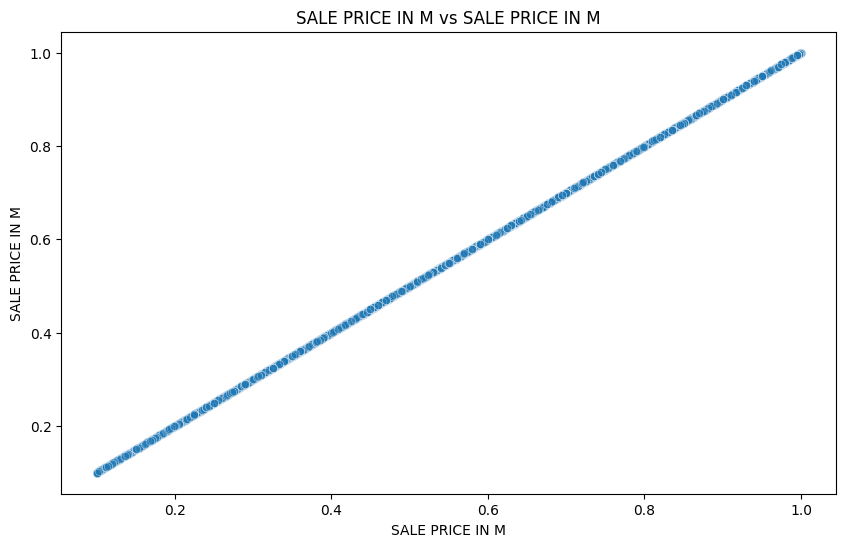

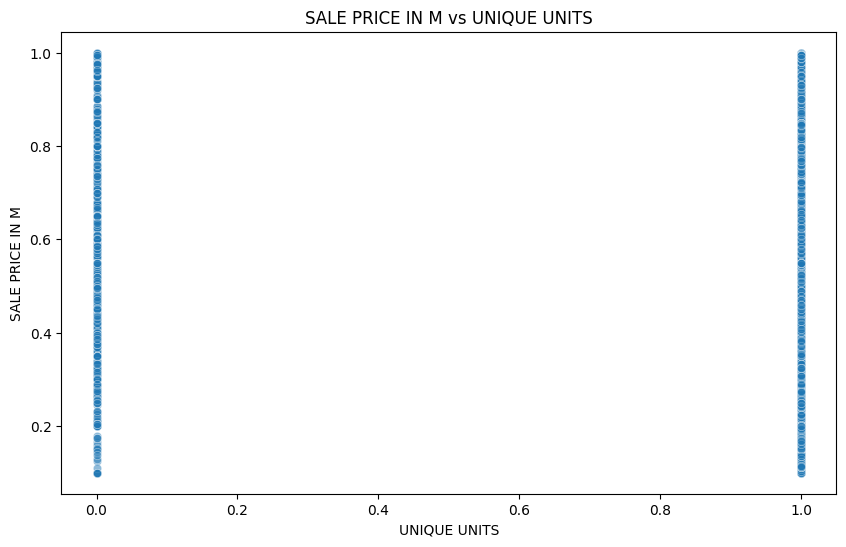

In [101]:
target = 'SALE PRICE IN M'
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y=target, data=df, alpha=0.5)
    plt.title(f'{target} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

Text(0.5, 1.0, "Borough by property's sales amount")

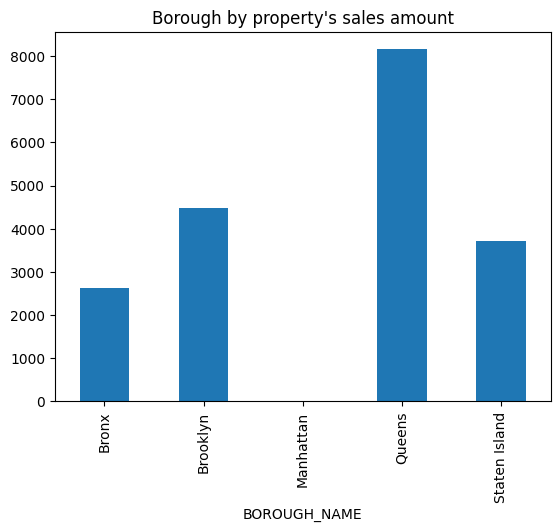

In [102]:
df['SALE PRICE'].groupby(df['BOROUGH_NAME']).count().plot.bar()
plt.title("Borough by property's sales amount")

Text(0.5, 1.0, "Borough by property's average price")

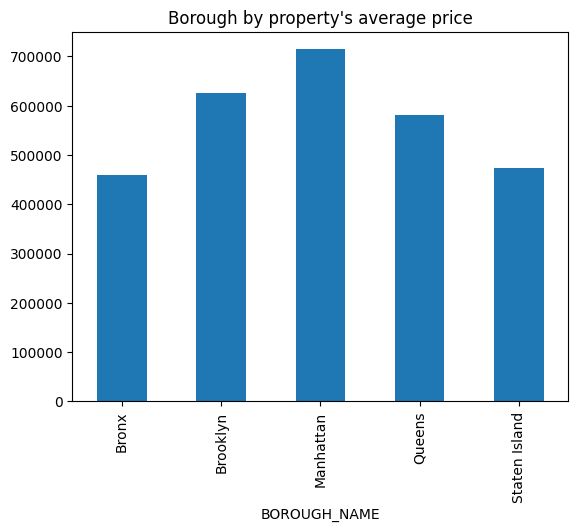

In [103]:
df['SALE PRICE'].groupby(df['BOROUGH_NAME']).mean().plot.bar()
plt.title("Borough by property's average price")

In [104]:
Bronx_sales = df[df['BOROUGH_NAME'] == 'Bronx']
Brooklyn_sales = df[df['BOROUGH_NAME'] == 'Brooklyn']
Manhattan_sales = df[df['BOROUGH_NAME'] == 'Manhattan']
Queens_sales = df[df['BOROUGH_NAME'] == 'Queens']
Staten_sales = df[df['BOROUGH_NAME'] == 'Staten Island']

<ipython-input-105-101a63e4954a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))


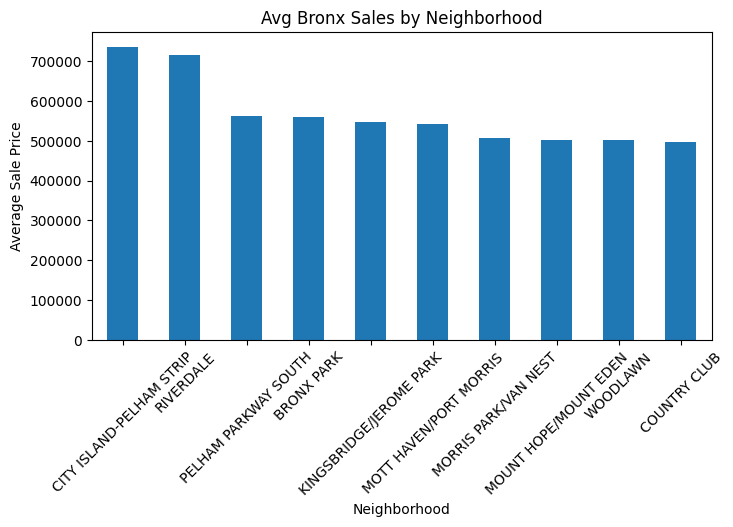

<ipython-input-105-101a63e4954a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))


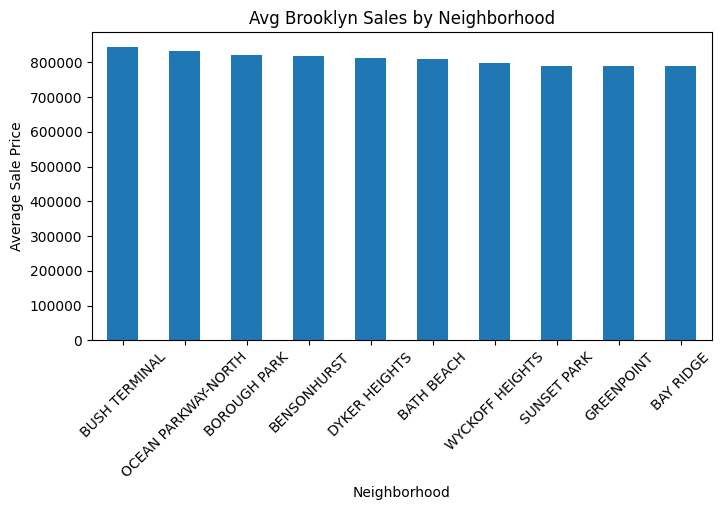

<ipython-input-105-101a63e4954a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))


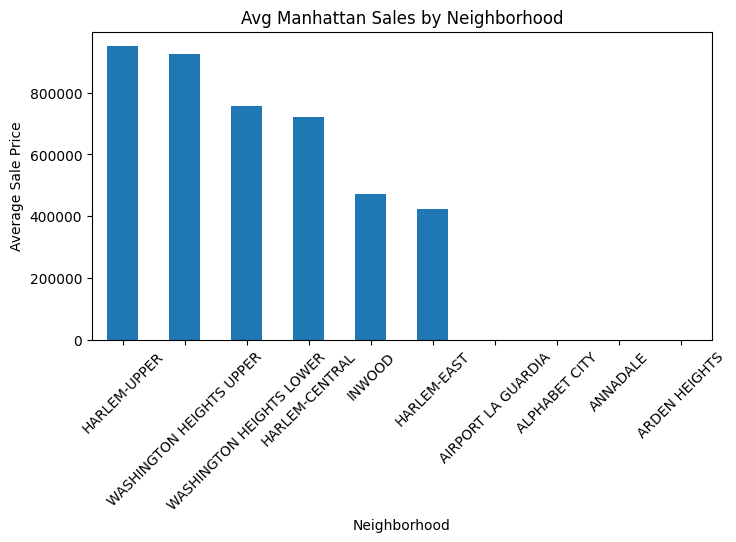

<ipython-input-105-101a63e4954a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))


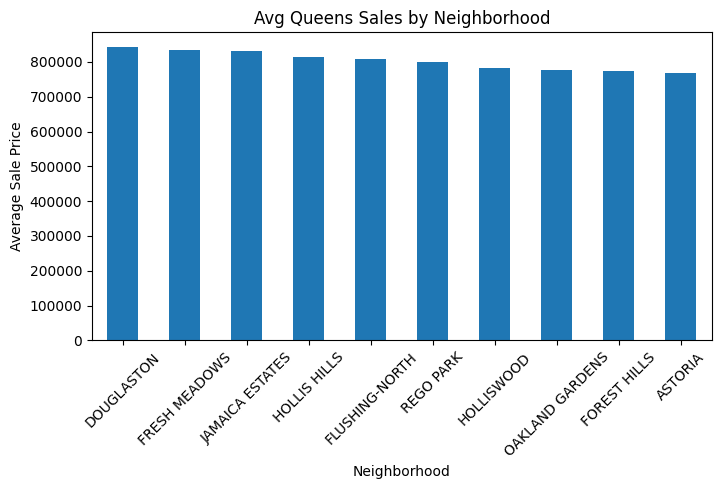

<ipython-input-105-101a63e4954a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))


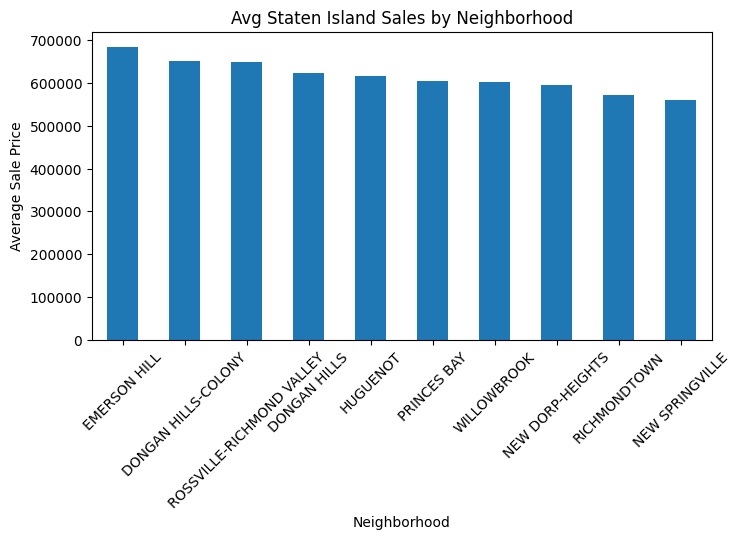

In [105]:
Borough_sales = [(Bronx_sales, 'Bronx'), (Brooklyn_sales, 'Brooklyn'),
                 (Manhattan_sales, 'Manhattan'), (Queens_sales, 'Queens'),
                 (Staten_sales, 'Staten Island')]

for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'Avg {name} Sales by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-106-b2e5e4740fd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))


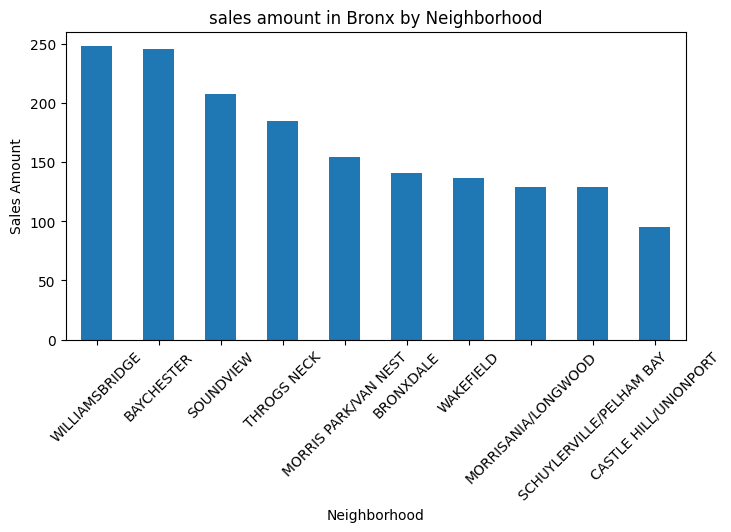

<ipython-input-106-b2e5e4740fd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))


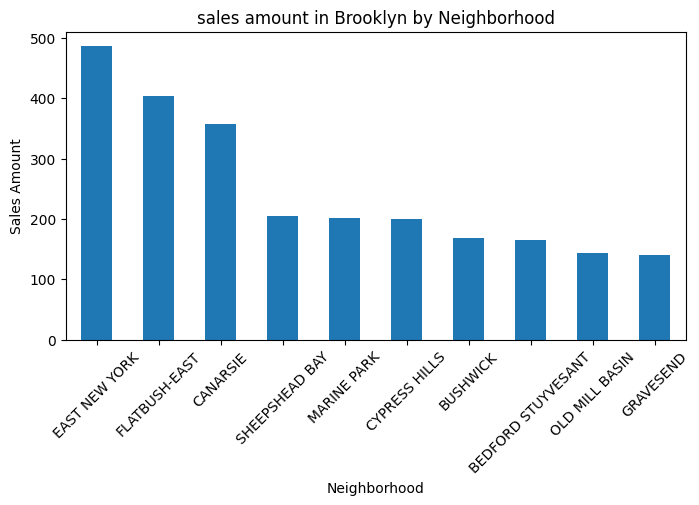

<ipython-input-106-b2e5e4740fd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))


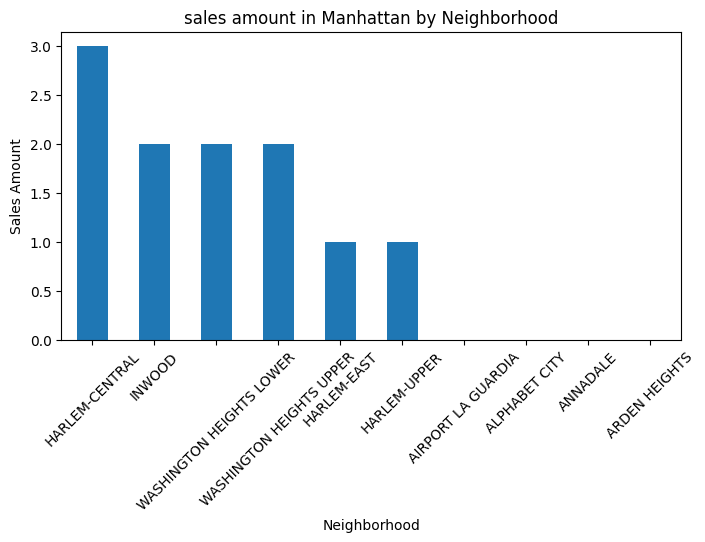

<ipython-input-106-b2e5e4740fd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))


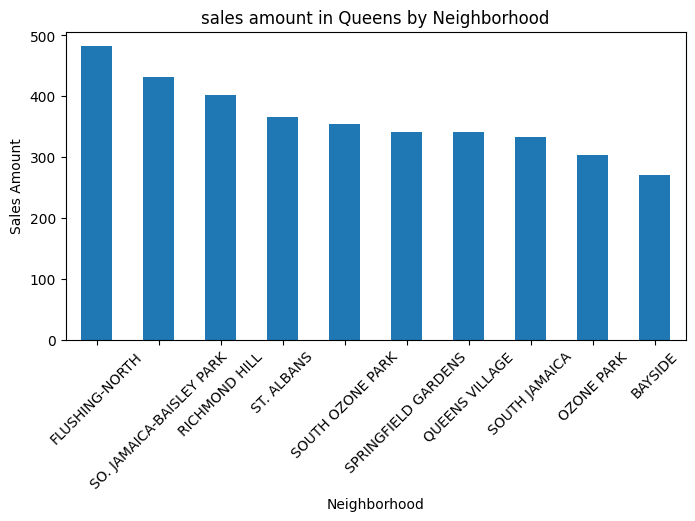

<ipython-input-106-b2e5e4740fd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))


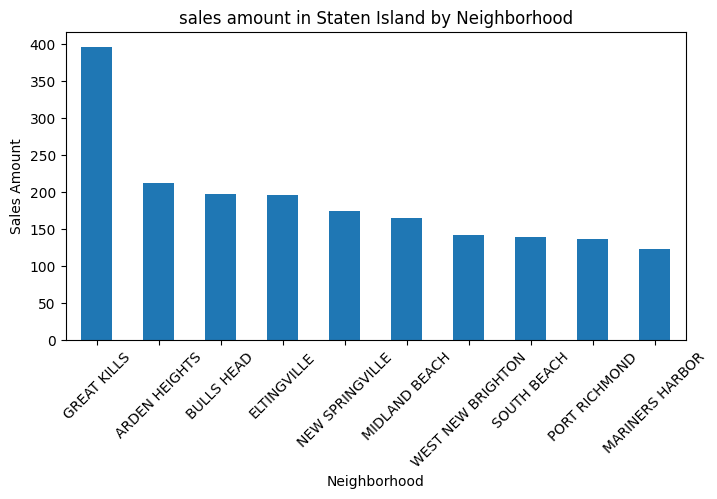

In [106]:
Borough_sales = [(Bronx_sales, 'Bronx'), (Brooklyn_sales, 'Brooklyn'),
                 (Manhattan_sales, 'Manhattan'), (Queens_sales, 'Queens'),
                 (Staten_sales, 'Staten Island')]

for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).count().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'sales amount in {name} by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-107-912160805182>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))


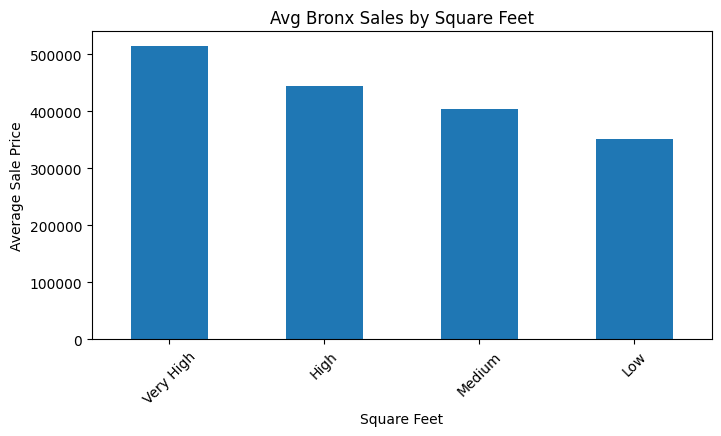

<ipython-input-107-912160805182>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))


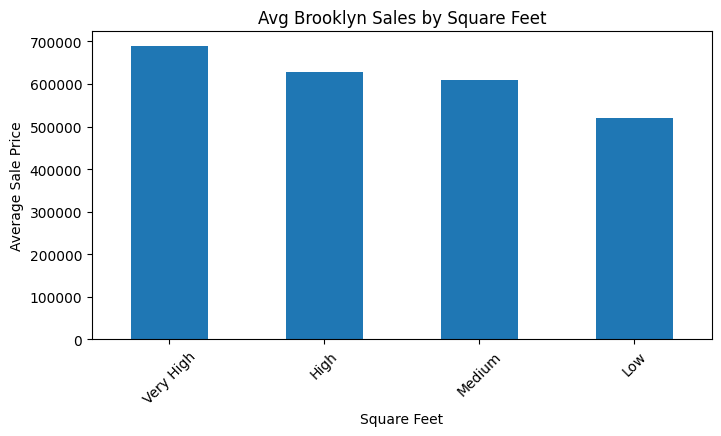

<ipython-input-107-912160805182>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))


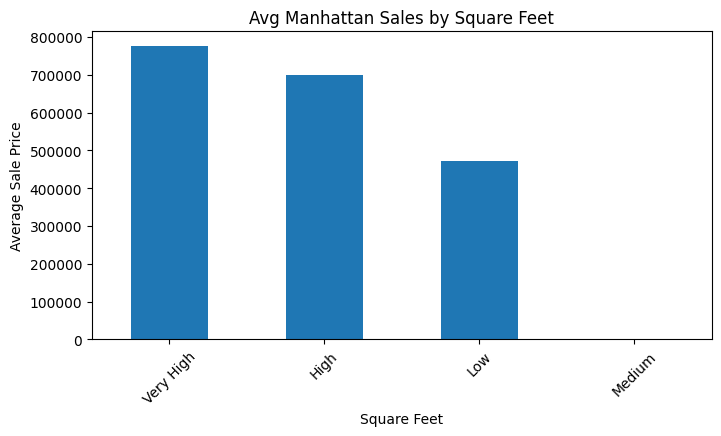

<ipython-input-107-912160805182>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))


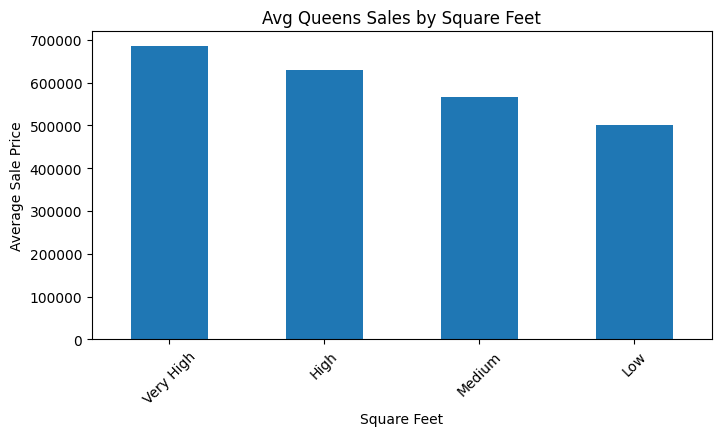

<ipython-input-107-912160805182>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))


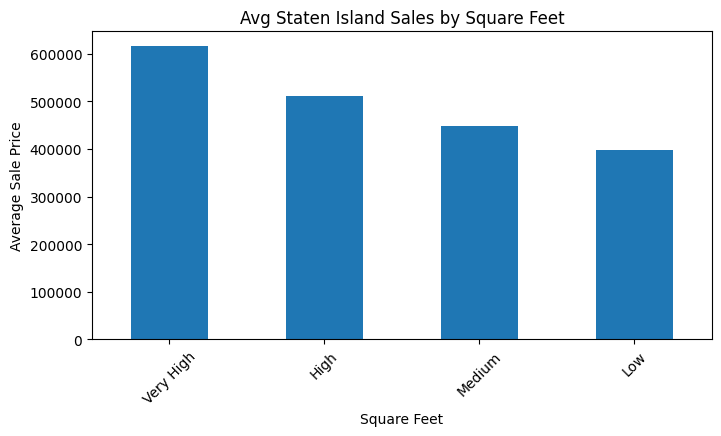

In [107]:
for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).mean().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'Avg {name} Sales by Square Feet')
    plt.xlabel('Square Feet')
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-108-063f68f60aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))


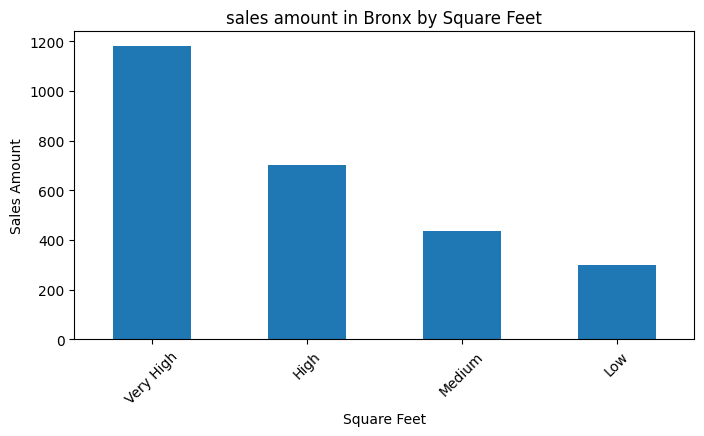

<ipython-input-108-063f68f60aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))


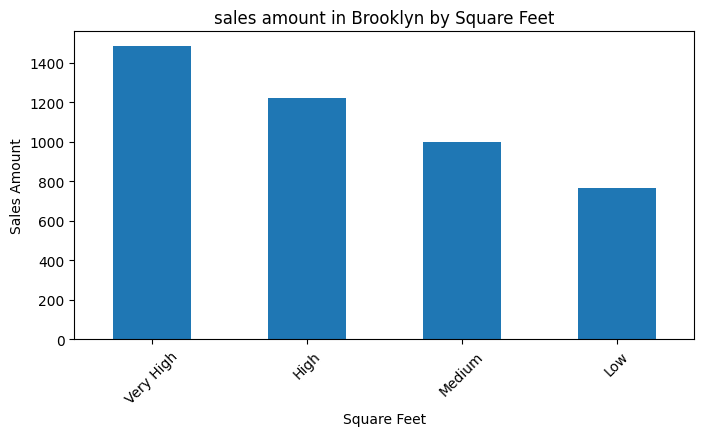

<ipython-input-108-063f68f60aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))


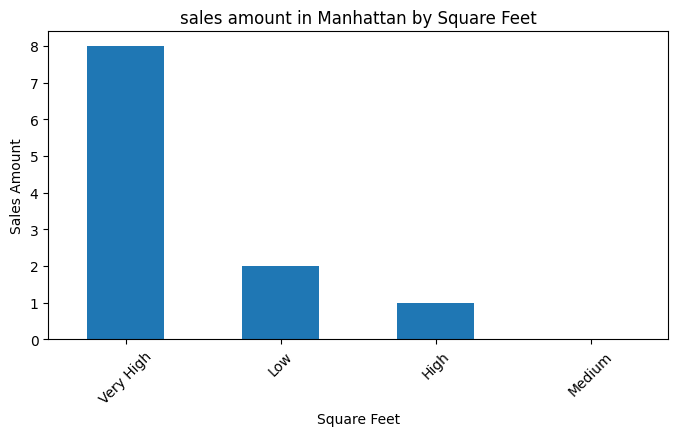

<ipython-input-108-063f68f60aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))


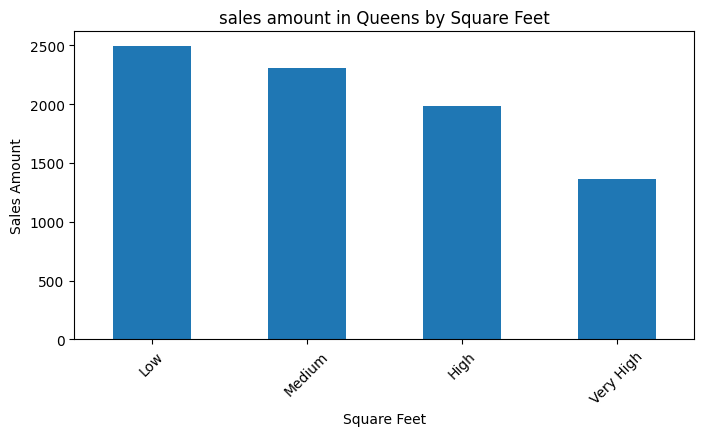

<ipython-input-108-063f68f60aaa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))


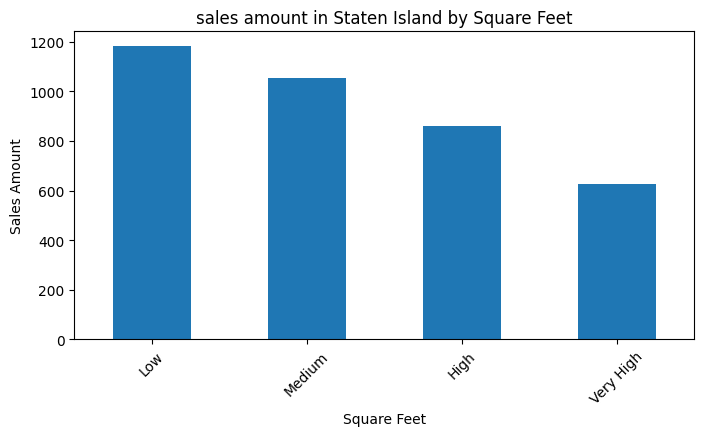

In [108]:
for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['GROSS SQUARE FEET binned']).count().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'sales amount in {name} by Square Feet')
    plt.xlabel('Square Feet')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-109-77a0cfc983cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))


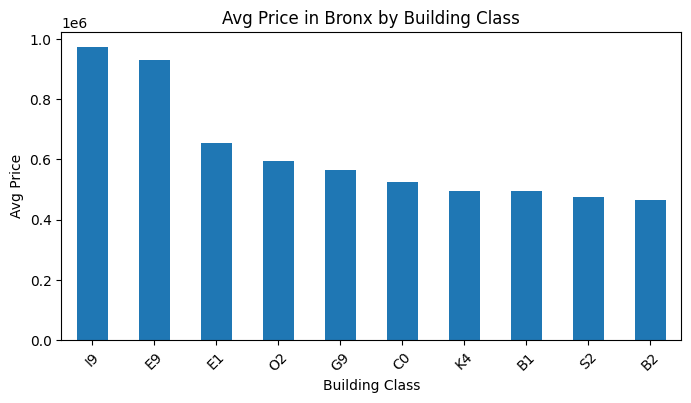

<ipython-input-109-77a0cfc983cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))


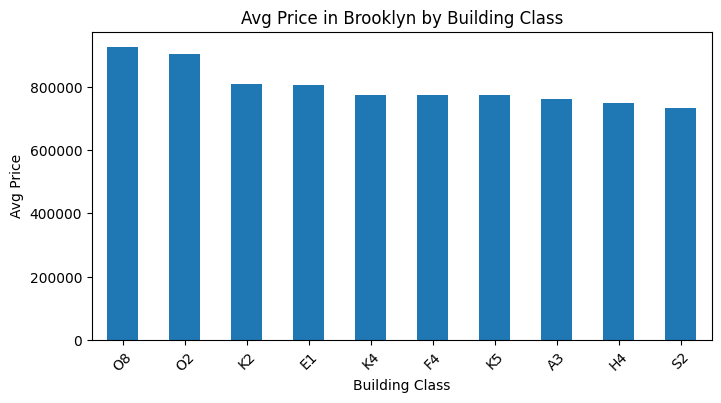

<ipython-input-109-77a0cfc983cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))


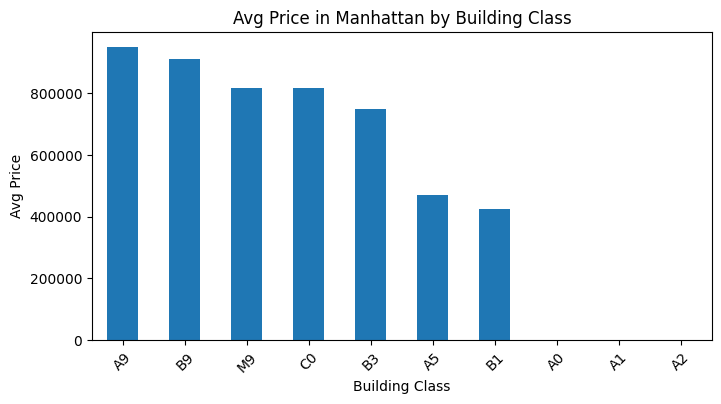

<ipython-input-109-77a0cfc983cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))


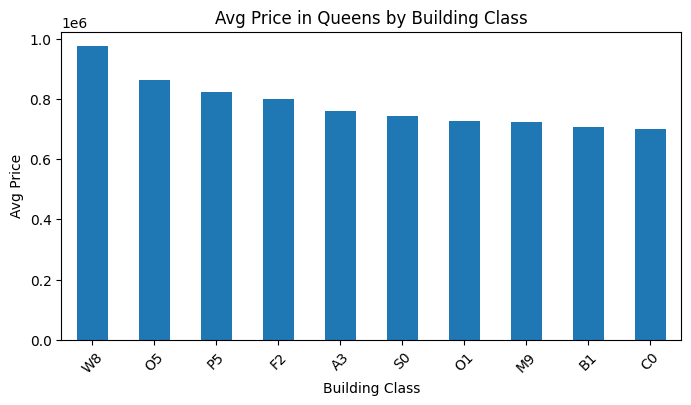

<ipython-input-109-77a0cfc983cc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))


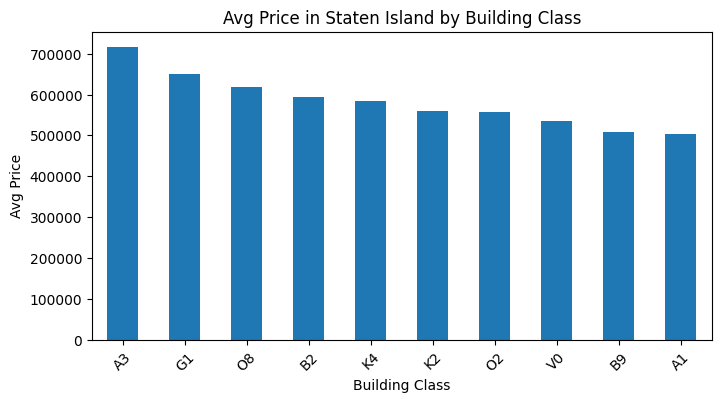

In [109]:
for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).mean().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'Avg Price in {name} by Building Class')
    plt.xlabel('Building Class')
    plt.ylabel('Avg Price')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-110-108b28137c56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))


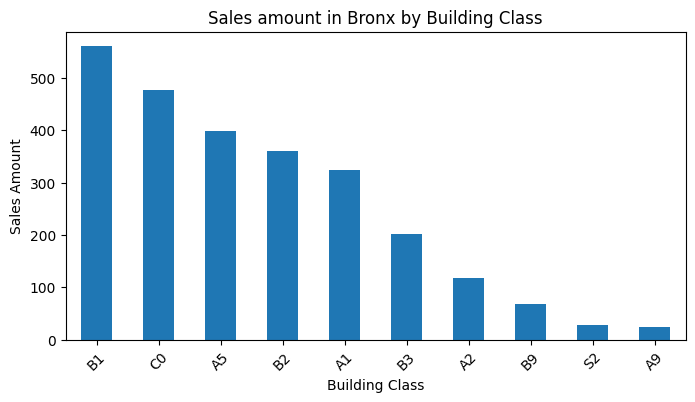

<ipython-input-110-108b28137c56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))


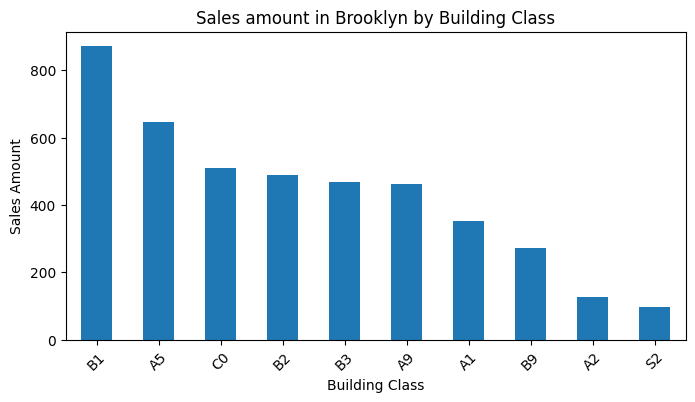

<ipython-input-110-108b28137c56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))


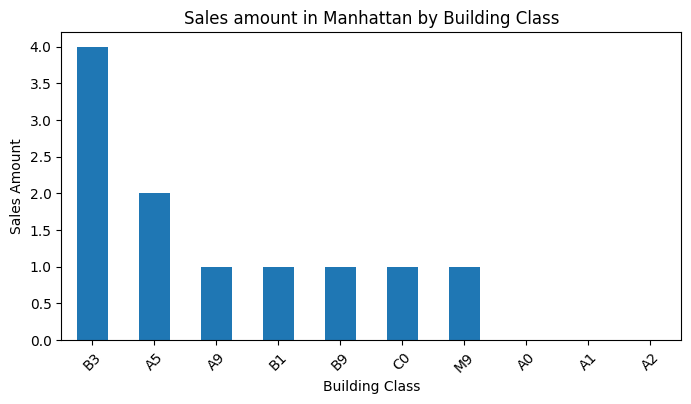

<ipython-input-110-108b28137c56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))


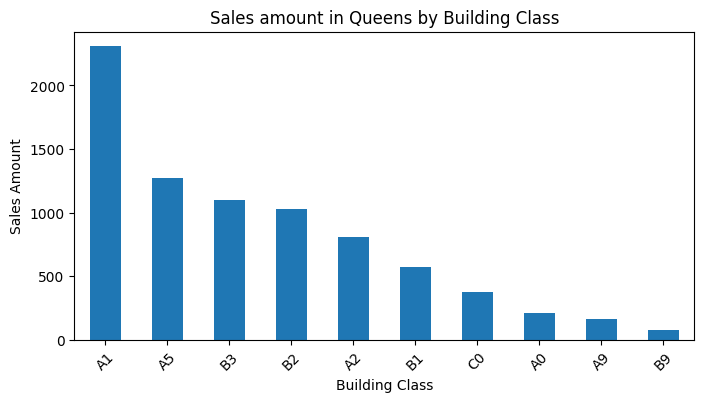

<ipython-input-110-108b28137c56>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))


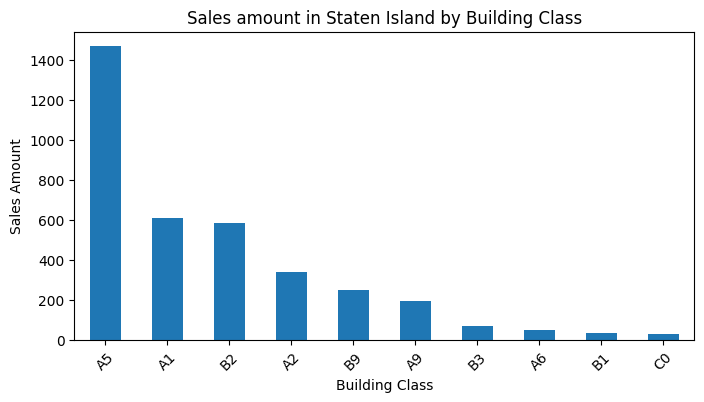

In [110]:
for df, name in Borough_sales:
    df['SALE PRICE'].groupby(df['BUILDING CLASS AT TIME OF SALE']).count().nlargest(10).plot.bar(figsize=(8, 4))
    plt.title(f'Sales amount in {name} by Building Class')
    plt.xlabel('Building Class')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

In [111]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Year', 'Month', 'BOROUGH_NAME',
       'GROSS SQUARE FEET binned', 'LAND SQUARE FEET binned',
       'TOTAL SQUARE FEET', 'TOTAL SQUARE FEET binned',
       'GROSS SQUARE FEET PRICE AVG', 'LAND SQUARE FEET PRICE AVG',
       'TOTAL SQUARE FEET PRICE AVG', 'SALE PRICE IN M', 'UNIQUE UNITS'],
      dtype='object')

In [112]:
df.head()

BOROUGH NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
42828        5     ANNADALE  01 ONE FAMILY DWELLINGS                       
42829        5     ANNADALE  01 ONE FAMILY DWELLINGS                       
42830        5     ANNADALE  01 ONE FAMILY DWELLINGS                       
42831        5     ANNADALE  01 ONE FAMILY DWELLINGS                       
42832        5     ANNADALE  01 ONE FAMILY DWELLINGS                       

      TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
42828                    1   6205   22                        A5   
42829                    1   6209   69                        A5   
42830                    1   6211   15                        A5   
42831                    1   6211   34                        A5   
42832                    1   6211   40                        A5   

                 ADDRESS  ZIP CODE  RESIDENTIAL UNITS  ...   BOROUGH_NAME  \
42828    83 EAGAN AVENUE     10312                  1  ...  Staten Island   
42829  195 MOSELY AVENUE     10312                  1  ...  Staten Island   
42830    17 EAGAN AVENUE     10312                  1  ...  Staten Island   
42831  100 SEGUINE PLACE     10312                  1  ...  Staten Island   
42832   92 SEGUINE PLACE     10312                  1  ...  Staten Island   

       GROSS SQUARE FEET binned  LAND SQUARE FEET binned  TOTAL SQUARE FEET  \
42828                    Medium                      Low             3125.0   
42829                    Medium                     High             4257.0   
42830                    Medium                      Low             3029.0   
42831                    Medium                      Low             3071.0   
42832                    Medium                      Low             3120.0   

       TOTAL SQUARE FEET binned  GROSS SQUARE FEET PRICE AVG  \
42828                       Low                   350.934937   
42829                      High                   348.069244   
42830                       Low                   364.317047   
42831                       Low                   364.317047   
42832                       Low                   419.792603   

      LAND SQUARE FEET PRICE AVG  TOTAL SQUARE FEET PRICE AVG SALE PRICE IN M  \
42828                 358.425781                   177.320404          0.4375   
42829                 207.927292                   130.168259          0.5790   
42830                 367.457733                   182.940323          0.3700   
42831                 357.500793                   180.438370          0.4390   
42832                 307.847931                   177.604568          0.3000   

       UNIQUE UNITS  
42828             1  
42829             1  
42830             1  
42831             1  
42832             1  

[5 rows x 31 columns]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3721 entries, 42828 to 47889
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         3721 non-null   int8          
 1   NEIGHBORHOOD                    3721 non-null   category      
 2   BUILDING CLASS CATEGORY         3721 non-null   category      
 3   TAX CLASS AT PRESENT            3721 non-null   category      
 4   BLOCK                           3721 non-null   int16         
 5   LOT                             3721 non-null   int16         
 6   BUILDING CLASS AT PRESENT       3721 non-null   category      
 7   ADDRESS                         3721 non-null   category      
 8   ZIP CODE                        3721 non-null   int16         
 9   RESIDENTIAL UNITS               3721 non-null   int16         
 10  COMMERCIAL UNITS                3721 non-null   int16         
 11  TOTA

**Objective 1** : Sale Price Distribution

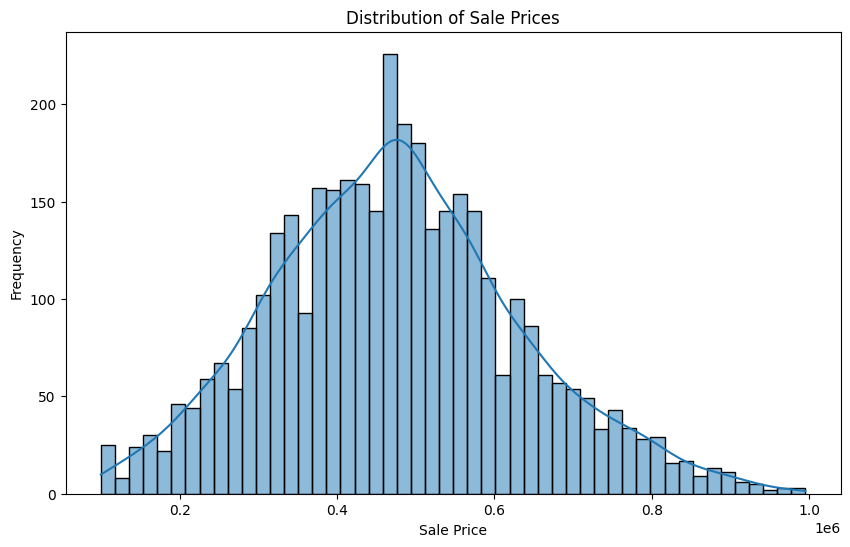

In [114]:
# Plot the distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(df['SALE PRICE'], bins=50, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


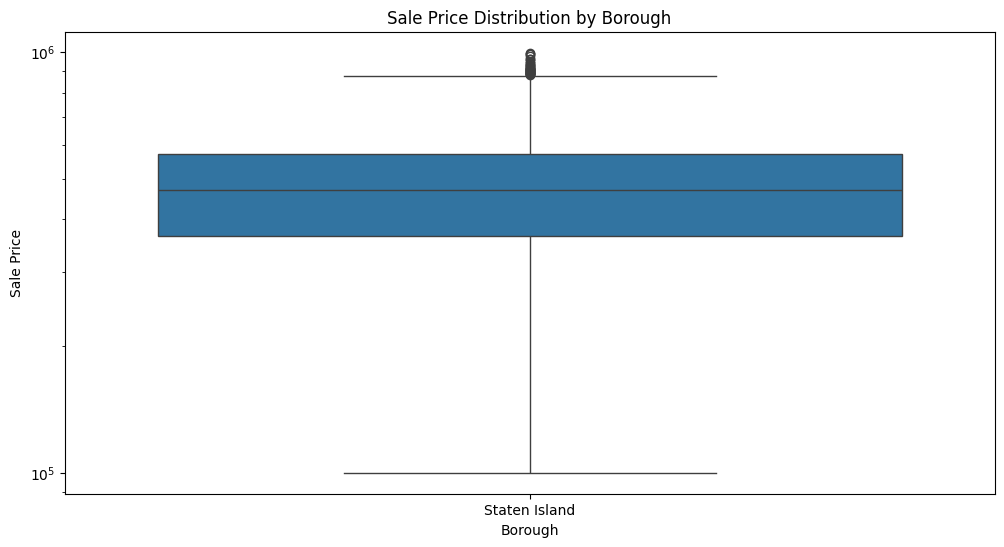

In [121]:
# Boxplot for sale prices by borough
plt.figure(figsize=(12, 6))
sns.boxplot(x='BOROUGH_NAME', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Sale Price')
plt.yscale('log')  # Log scale for better visualization
plt.show()


In [123]:
# Group data by borough and calculate the average sale price
average_prices = df.groupby('BOROUGH_NAME')['SALE PRICE'].mean().sort_values(ascending=False)

# Display the results
print("Average Sale Prices by Borough:")
print(average_prices)

# Identify boroughs with the highest and lowest average sale prices
highest_avg_borough = average_prices.idxmax()
lowest_avg_borough = average_prices.idxmin()

print(f"\nThe borough with the highest average sale price is {highest_avg_borough}.")
print(f"The borough with the lowest average sale price is {lowest_avg_borough}.")


Average Sale Prices by Borough:
BOROUGH_NAME
Staten Island    474336.65625
Name: SALE PRICE, dtype: float32

The borough with the highest average sale price is Staten Island.
The borough with the lowest average sale price is Staten Island.


**Objective 2:** Borough level trends

BOROUGH
5    474336.65625
Name: SALE PRICE, dtype: float32


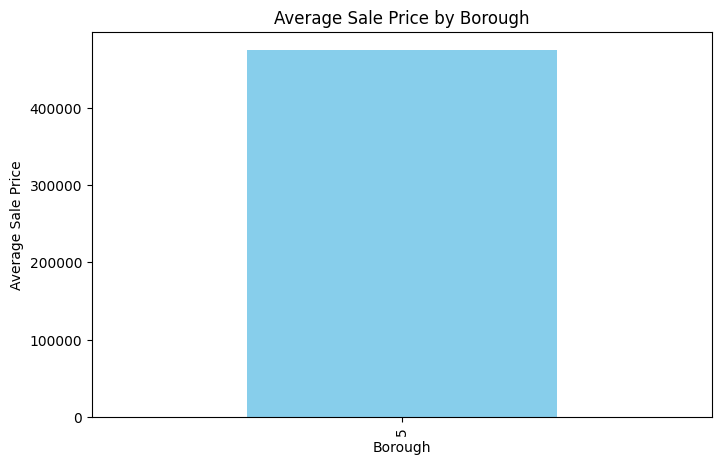

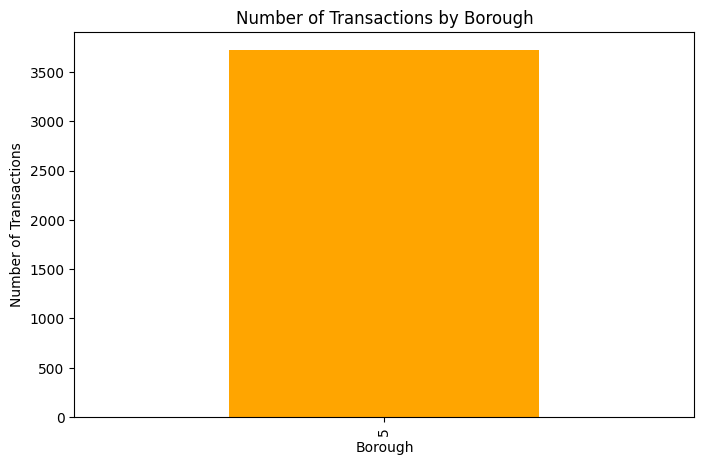

In [115]:
# Average sale price by borough
borough_avg_price = df.groupby('BOROUGH')['SALE PRICE'].mean()
print(borough_avg_price)

# Plot average sale price by borough
borough_avg_price.plot(kind='bar', figsize=(8, 5), title='Average Sale Price by Borough', color='skyblue')
plt.ylabel('Average Sale Price')
plt.xlabel('Borough')
plt.show()

# Number of transactions by borough
borough_counts = df['BOROUGH'].value_counts()
borough_counts.plot(kind='bar', figsize=(8, 5), title='Number of Transactions by Borough', color='orange')
plt.ylabel('Number of Transactions')
plt.xlabel('Borough')
plt.show()


**Objective 3:** Examining building classes

BUILDING CLASS AT PRESENT
A5    1478
A1     614
B2     586
A2     337
B9     252
A9     183
B3      68
A6      47
B1      32
C0      28
Name: count, dtype: int64


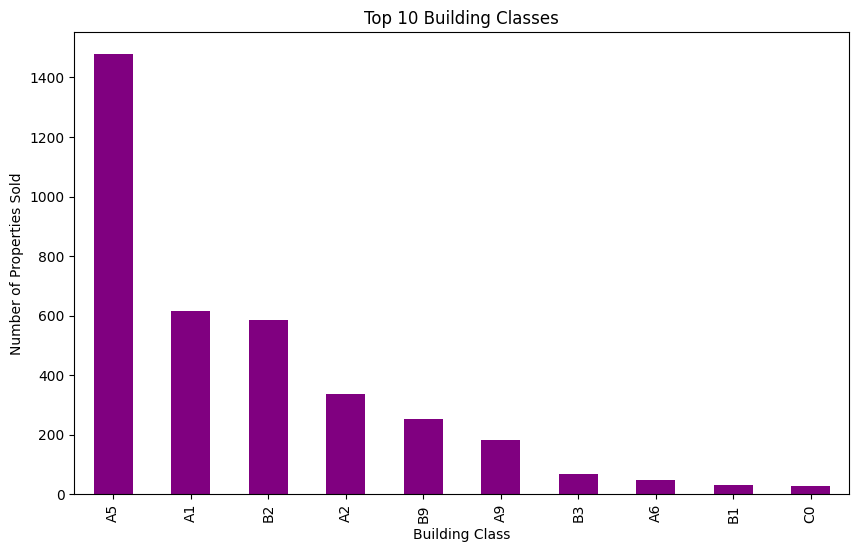

In [116]:
# Most common building classes
building_counts = df['BUILDING CLASS AT PRESENT'].value_counts()
print(building_counts.head(10))

# Plot top 10 building classes
building_counts.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Building Classes', color='purple')
plt.ylabel('Number of Properties Sold')
plt.xlabel('Building Class')
plt.show()


**Objective 4:** Studying Seasonal trends

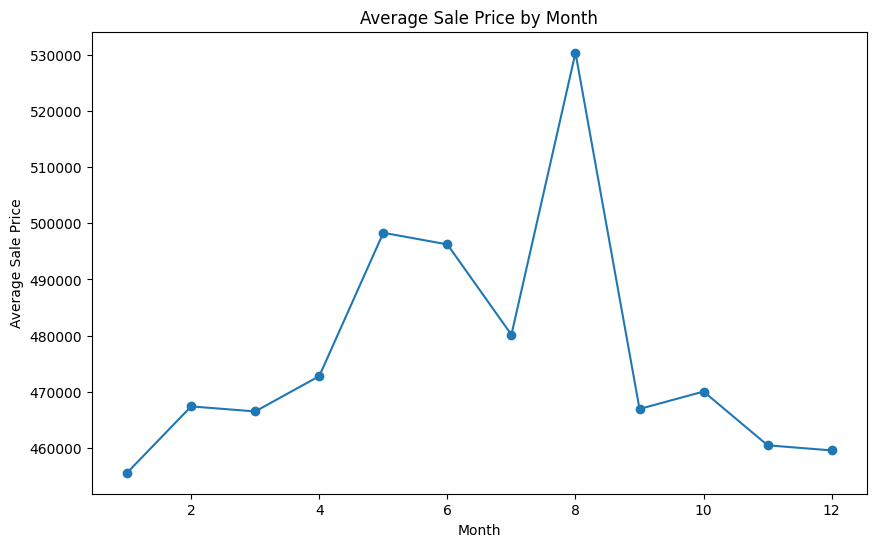

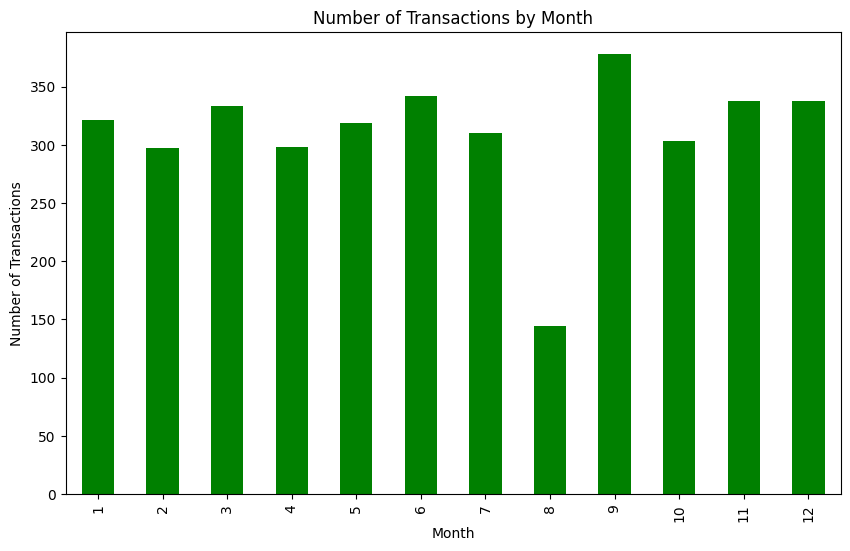

In [117]:
# Add a 'Month' column
df['Month'] = df['SALE DATE'].dt.month

# Average sale price by month
monthly_avg_price = df.groupby('Month')['SALE PRICE'].mean()
monthly_avg_price.plot(kind='line', figsize=(10, 6), title='Average Sale Price by Month', marker='o')
plt.ylabel('Average Sale Price')
plt.xlabel('Month')
plt.show()

# Number of sales by month
monthly_counts = df['Month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', figsize=(10, 6), title='Number of Transactions by Month', color='green')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()


**Objective 5:** Identifying Hige-value areas

BOROUGH  BLOCK
5        1602     12107817.0
         2873     11950934.0
         6979     10580115.0
         7356      8889288.0
         6023      7877623.0
         1116      7723441.0
         6022      7424999.0
         7596      7109900.0
         5494      6329799.0
         950       6316713.0
Name: SALE PRICE, dtype: float32


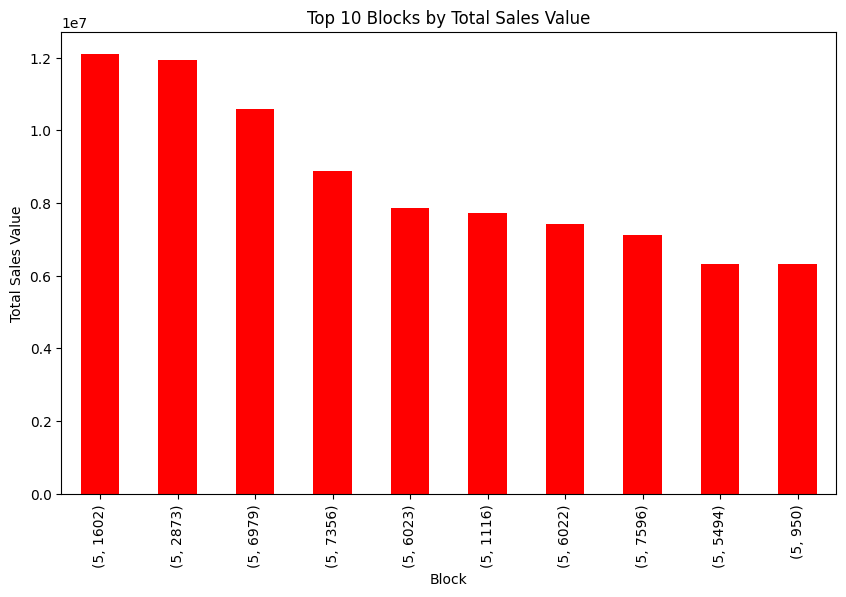

In [118]:
# Find blocks with the highest total sales value
block_sales = df.groupby(['BOROUGH', 'BLOCK'])['SALE PRICE'].sum().sort_values(ascending=False)
print(block_sales.head(10))

# Visualize the top blocks
block_sales.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Blocks by Total Sales Value', color='red')
plt.ylabel('Total Sales Value')
plt.xlabel('Block')
plt.show()
